# MedBioInfo 2023 - on site course

## DAY 1 - PM
### BLAST
1. Use blastn with sbatch scripts.
2. Inspect and annotate hits.
3. Benchmark to estimate cpu.hours

In [2]:
# prepare the directories
mkdir -p /shared/home/rgrochowski/medbioinfo_folder/radoslaw/MedBioinfo/analyses/blastn
mkdir -p /shared/home/rgrochowski/medbioinfo_folder/radoslaw/MedBioinfo/data/blastdb
cd /shared/home/rgrochowski/medbioinfo_folder/radoslaw/MedBioinfo/analyses/blastn

In [2]:
# make a binary BLAST database for the later queries of viral reference sequences
module load blast
zcat /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz | makeblastdb -dbtype 'nucl' -out ../../data/blast_db/refseq_viral_genomic -title 'SARS-CoV-2_medbioinfo'



Building a new DB, current time: 06/13/2023 15:17:00
New DB name:   /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/data/blast_db/refseq_viral_genomic
New DB title:  SARS-CoV-2_medbioinfo
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/data/blast_db/refseq_viral_genomic
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 14813 sequences in 4.3444 seconds.




In [18]:
# inspect the database
blastdbcmd -info -db ../../data/blast_db/refseq_viral_genomic

Database: SARS-CoV-2_medbioinfo
	14,813 sequences; 469,589,088 total bases

Date: May 29, 2023  11:10 AM	Longest sequence: 2,473,870 bases

BLASTDB Version: 5

Volumes:
	/shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/data/blast_db/refseq_viral_genomic


In [8]:
# make sequence subsets with seqkit to use as queries for BLASTN
module load seqkit
# seqkit range requires FASTA as an input
seqkit fq2fa  ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fastq > ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fna
seqkit range -r 1:100  ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fna > ../../data/merged_pairs/samples_for_blast/ERR6913112_sample_100.fna
seqkit range -r 101:1100  ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fna > ../../data/merged_pairs/samples_for_blast/ERR6913112_sample_1000.fna
seqkit range -r 1001:11000  ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fna > ../../data/merged_pairs/samples_for_blast/ERR6913112_sample_10000.fna

[ERRO] stat >ERR6913349.42.1 42 length=149: no such file or directory
xargs: seqkit: exited with status 255; aborting


: 124

In [9]:
# inspect the original file and obtained subsets 
# seqkit stats ../../data/merged_pairs/ERR6913112.flash.extendedFrags.fastq
# seqkit stats ../../data/merged_pairs/samples_for_blast/*

file                                                                   format  type  num_seqs    sum_len  min_len  avg_len  max_len
../../data/merged_pairs/samples_for_blast/ERR6913112_sample_10000.fna  FASTA   DNA     10,000  1,450,156       35      145      292
../../data/merged_pairs/samples_for_blast/ERR6913112_sample_1000.fna   FASTA   DNA      1,000    144,458       40    144.5      292
../../data/merged_pairs/samples_for_blast/ERR6913112_sample_100.fna    FASTA   DNA        100     14,203       58      142      289
../../data/merged_pairs/samples_for_blast/ERR6913349_sample_100_3.fna                       0          0        0        0        0
../../data/merged_pairs/samples_for_blast/ERR6913349_sample_100.fna                         0          0        0        0        0
file                                                          format  type  num_seqs    sum_len  min_len  avg_len  max_len
../../data/merged_pairs/ERR6913112.flash.extendedFrags.fastq  FASTQ   DNA     27,955 

In [133]:
# run the batch script for the blastn query
sbatch ../../scripts/fastq_subsamples_blastn_vs_viral_refseq_sbatch.sh

Submitted batch job 33785582


In [146]:
# squeue -u rgrochowski

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          33782907      fast  jupyter rgrochow  R    1:52:58      1 cpu-node-52


In [11]:
# Inspect the hits
# cat ERR6913112_sample_blast_100.tsv | head -5
# query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score

In [13]:
# Inspect the hits
# cat ERR6913112_sample_blast_1000.tsv | head -5
# cat ERR6913112_sample_blast_1000.tsv | wc -l
# query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score

ERR6913112.1207.1	NC_031940.1	100.000	30	0	0	92	121	19443	19472	8.45e-07	56.5
ERR6913112.1207.1	NC_031940.1	100.000	30	0	0	92	121	59032	59061	8.45e-07	56.5
ERR6913112.1207.1	NC_004313.1	100.000	30	0	0	92	121	21074	21103	8.45e-07	56.5
ERR6913112.1208.1	NC_031940.1	100.000	30	0	0	92	121	19443	19472	8.45e-07	56.5
ERR6913112.1208.1	NC_031940.1	100.000	30	0	0	92	121	59032	59061	8.45e-07	56.5
6


In [14]:
# Inspect the hits
# cat ERR6913112_sample_blast_10000.tsv | head -5
# cat ERR6913112_sample_blast_10000.tsv | wc -l
# query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score

ERR6913112.1207.1	NC_031940.1	100.000	30	0	0	92	121	19443	19472	8.45e-07	56.5
ERR6913112.1207.1	NC_031940.1	100.000	30	0	0	92	121	59032	59061	8.45e-07	56.5
ERR6913112.1207.1	NC_004313.1	100.000	30	0	0	92	121	21074	21103	8.45e-07	56.5
ERR6913112.1208.1	NC_031940.1	100.000	30	0	0	92	121	19443	19472	8.45e-07	56.5
ERR6913112.1208.1	NC_031940.1	100.000	30	0	0	92	121	59032	59061	8.45e-07	56.5
173


In [13]:
# run the batch script for the arrayed blastn query 
sbatch ../../scripts/fastq_subsamples_blastn_vs_viral_refseq_sbatch_array.sh

Submitted batch job 33792917


In [23]:
squeue -u rgrochowski

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
        33792917_8      fast MedBioin rgrochow  R       2:16      1 cpu-node-76
          33791617      fast  jupyter rgrochow  R      45:13      1 cpu-node-29


In [22]:
sacct -j  33792917 --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList 

          JobID            JobName  ReqCPUS     ReqMem  Timelimit      State ExitCode               Start ElapsedRaw CPUTimeRAW     MaxRSS        NodeList 
--------------- ------------------ -------- ---------- ---------- ---------- -------- ------------------- ---------- ---------- ---------- --------------- 
     33792917_1         MedBioinfo       12       32Gn   02:00:00  COMPLETED      0:0 2023-06-14T12:20:46          6         72                cpu-node-72 
33792917_1.bat+              batch       12       32Gn             COMPLETED      0:0 2023-06-14T12:20:46          6         72      1240K     cpu-node-72 
   33792917_1.0             seqkit       12       32Gn             COMPLETED      0:0 2023-06-14T12:20:47          1         12      1148K     cpu-node-72 
   33792917_1.1         ERR6913112       12       32Gn             COMPLETED      0:0 2023-06-14T12:20:48          4         48      1156K     cpu-node-72 
     33792917_2         MedBioinfo       12       32Gn   02:00:0

In [348]:
head -1 array/ERR6913113_blastn_vs_viral.out 

ERR6913113.734.1	NC_019917.1	80.899	89	13	4	14	100	31180	31266	2.14e-10	67.6


In [7]:
cat array/* | cut -d$'\t' -f 1 |  sort | uniq -c | sort -nr > full_refseq_viral_hits_sorted.counts
cat array/* | cut -d$'\t' -f 2 |  sort | uniq -c | sort -nr > full_refseq_virus_sorted.counts

bash: full_refseq_viral_hits_sorted.counts: cannot overwrite existing file
uniq: write error: Broken pipe


In [6]:
# 17427 alignments were obtained
cat array/* | wc -l

17427


In [5]:
# 8075 distinct alignments were obtained
cat full_refseq_viral_hits_sorted.counts | wc -l

8075


In [8]:
# 1054 distinct viral genomes were aligned to
cat full_refseq_virus_sorted.counts | wc -l

1054


In [34]:
# Make a annotated summary of found hits
sed -E 's/^ +//' full_refseq_virus_sorted.counts > full_refseq_viral_hits_sorted_counts.noleadingspace
cut -f2 -d" " full_refseq_viral_hits_sorted_counts.noleadingspace > full_refseq_viral_hits_sorted.ids
sed 's/^/\>/' full_refseq_viral_hits_sorted.ids > full_refseq_viral_hits_sorted_ids.patterns
zgrep -f full_refseq_viral_hits_sorted_ids.patterns /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz > full_refseq_viral_hits_sorted_refseq_definitions.txt
sed -E 's/^>//' full_refseq_viral_hits_sorted_refseq_definitions.txt > full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt.txt
sort -k1 full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt.txt > full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt_sorted.txt
sort -k2 full_refseq_viral_hits_sorted_counts.noleadingspace > full_refseq_viral_hits_sorted_counts_noleadingspace.sorted
join -1 2 -2 1 full_refseq_viral_hits_sorted_counts_noleadingspace.sorted full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt_sorted.txt | sort -n -k2 > full_refseq_viral_hits_sorted.counts.definitions

In [5]:
head full_refseq_viral_hits_sorted.counts.definitions

AC_000006.1 1 Human adenovirus D, complete genome
NC_000852.5 1 Paramecium bursaria Chlorella virus 1, complete genome
NC_000898.1 1 Human herpesvirus 6B, complete genome
NC_001317.1 1 Escherichia phage 186, complete genome
NC_001609.1 1 Enterobacteria phage P4, complete genome
NC_001664.4 1 Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102
NC_002072.2 1 Streptococcus phage DT1, complete genome
NC_002484.2 1 Bacteriophage D3, complete genome
NC_002669.1 1 Lactococcus prophage bIL310, complete genome
NC_003157.5 1 Streptococcus phage phiNIH1.1, complete genome


In [10]:
# My hits annotated
head full_refseq_viral_hits_sorted_counts.noleadingspace | cut  -d' ' -f2 | xargs -I {} grep {}  full_refseq_viral_hits_sorted.counts.definitions

NC_054662.1 3195 Streptomyces phage Omar, complete genome
NC_045512.2 2364 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
NC_004718.3 633 SARS coronavirus Tor2, complete genome
NC_027981.1 431 Vibrio phage VP58.5, complete genome
NC_004456.1 374 Vibrio phage VHML, complete genome
NC_019722.1 354 Vibrio phage vB_VpaM_MAR, complete genome
NC_014470.1 325 Bat coronavirus BM48-31/BGR/2008, complete genome
NC_031910.1 148 Streptococcus phage phiARI0031, complete genome
NC_031929.1 145 Streptococcus phage phiARI0468-1, complete genome
NC_024370.1 145 Streptococcus phage IC1, complete sequence


**3. Benchmark to estimate cpu.hours, etc.**

In [3]:
# Import the usage details for the arrayed blastn run.
33598759_sacct -j 33792917 -P --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
    | grep ERR >| blastn_full_FASTQ_vs_viral_sbatch_array.sacct
cat blastn_full_FASTQ_vs_viral_sbatch_array.sacct
# cat blastn_full_FASTQ_vs_viral_sbatch_array.sacct | cut -d'|' -f 2 | tr -s '\n' ','

33583541_1.1|ERR6913112|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:25|4|48|1232K|cpu-node-1
33583541_2.1|ERR6913113|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:25|19|228|1228K|cpu-node-33
33583541_3.1|ERR6913320|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:27|121|1452|443864K|cpu-node-33
33583541_4.1|ERR6913209|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:25|2|24|1228K|cpu-node-43
33583541_5.1|ERR6913122|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:27|45|540|398692K|cpu-node-43
33583541_6.1|ERR6913208|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:25|6|72|1228K|cpu-node-67
33583541_7.1|ERR6913218|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:24|16|192|1228K|cpu-node-67
33583541_8.1|ERR6913349|12|5Gn||COMPLETED|0:0|2023-05-29T15:36:29|174|2088|565848K|cpu-node-88
ERR6913112,ERR6913113,ERR6913320,ERR6913209,ERR6913122,ERR6913208,ERR6913218,ERR6913349,

In [28]:
# Upload the resource usage details to the common database.
sqlite3 -batch -separator "|" /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
    ".import ./blastn_full_FASTQ_vs_viral_sbatch_array.sacct blastn_viral_resources_used"

In [27]:
# correction of wrong job names
#sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db "delete from blastn_viral_resources_used where JobName in ('ERR6913112', 'ERR6913113', 'ERR6913320', 'ERR6913209', 'ERR6913122', 'ERR6913208', 'ERR6913218', 'ERR6913349');"

In [30]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db "select * from blastn_viral_resources_used where JobID like '33583541%';"

JobID         JobName     ReqCPUS  ReqMem  Timelimit  State      ExitCode  Start                ElapsedRAW  CPUTimeRAW  MaxRSS   NodeList   
------------  ----------  -------  ------  ---------  ---------  --------  -------------------  ----------  ----------  -------  -----------
33583541_1.1  ERR6913112  12       5Gn                COMPLETED  0:0       2023-05-29T15:36:25  4           48          1232K    cpu-node-1 
33583541_2.1  ERR6913113  12       5Gn                COMPLETED  0:0       2023-05-29T15:36:25  19          228         1228K    cpu-node-33
33583541_3.1  ERR6913320  12       5Gn                COMPLETED  0:0       2023-05-29T15:36:27  121         1452        443864K  cpu-node-33
33583541_4.1  ERR6913209  12       5Gn                COMPLETED  0:0       2023-05-29T15:36:25  2           24          1228K    cpu-node-43
33583541_5.1  ERR6913122  12       5Gn                COMPLETED  0:0       2023-05-29T15:36:27  45          540         398692K  cpu-node-43
33583541_6.1 

**SWITCH TO R ENV**

In [46]:
# Load required packages
library(DBI)
library(data.table)
library(ggplot2)
library(ggpubr)
library(scales)

options(repr.plot.width = 30, repr.plot.height = 10)
theme_set(theme(text = element_text(size = 15)))

In [53]:
# Import the relevant data from the common database.
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
# cpu <-dbGetQuery(mydb, 'select JobName,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc from blastn_viral_resources_used \ 
# cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')
cpu <-dbGetQuery(mydb, 'select * from blastn_viral_resources_used cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')

cpu <- setDT(cpu)
cpu[, ':=' (CPUTimeRAW = as.POSIXct(as.ITime(CPUTimeRAW)), ElapsedRAW = as.POSIXct(as.ITime(ElapsedRAW)), 
            ReqMemNum = as.numeric(sub("Gn", '', ReqMem)))]

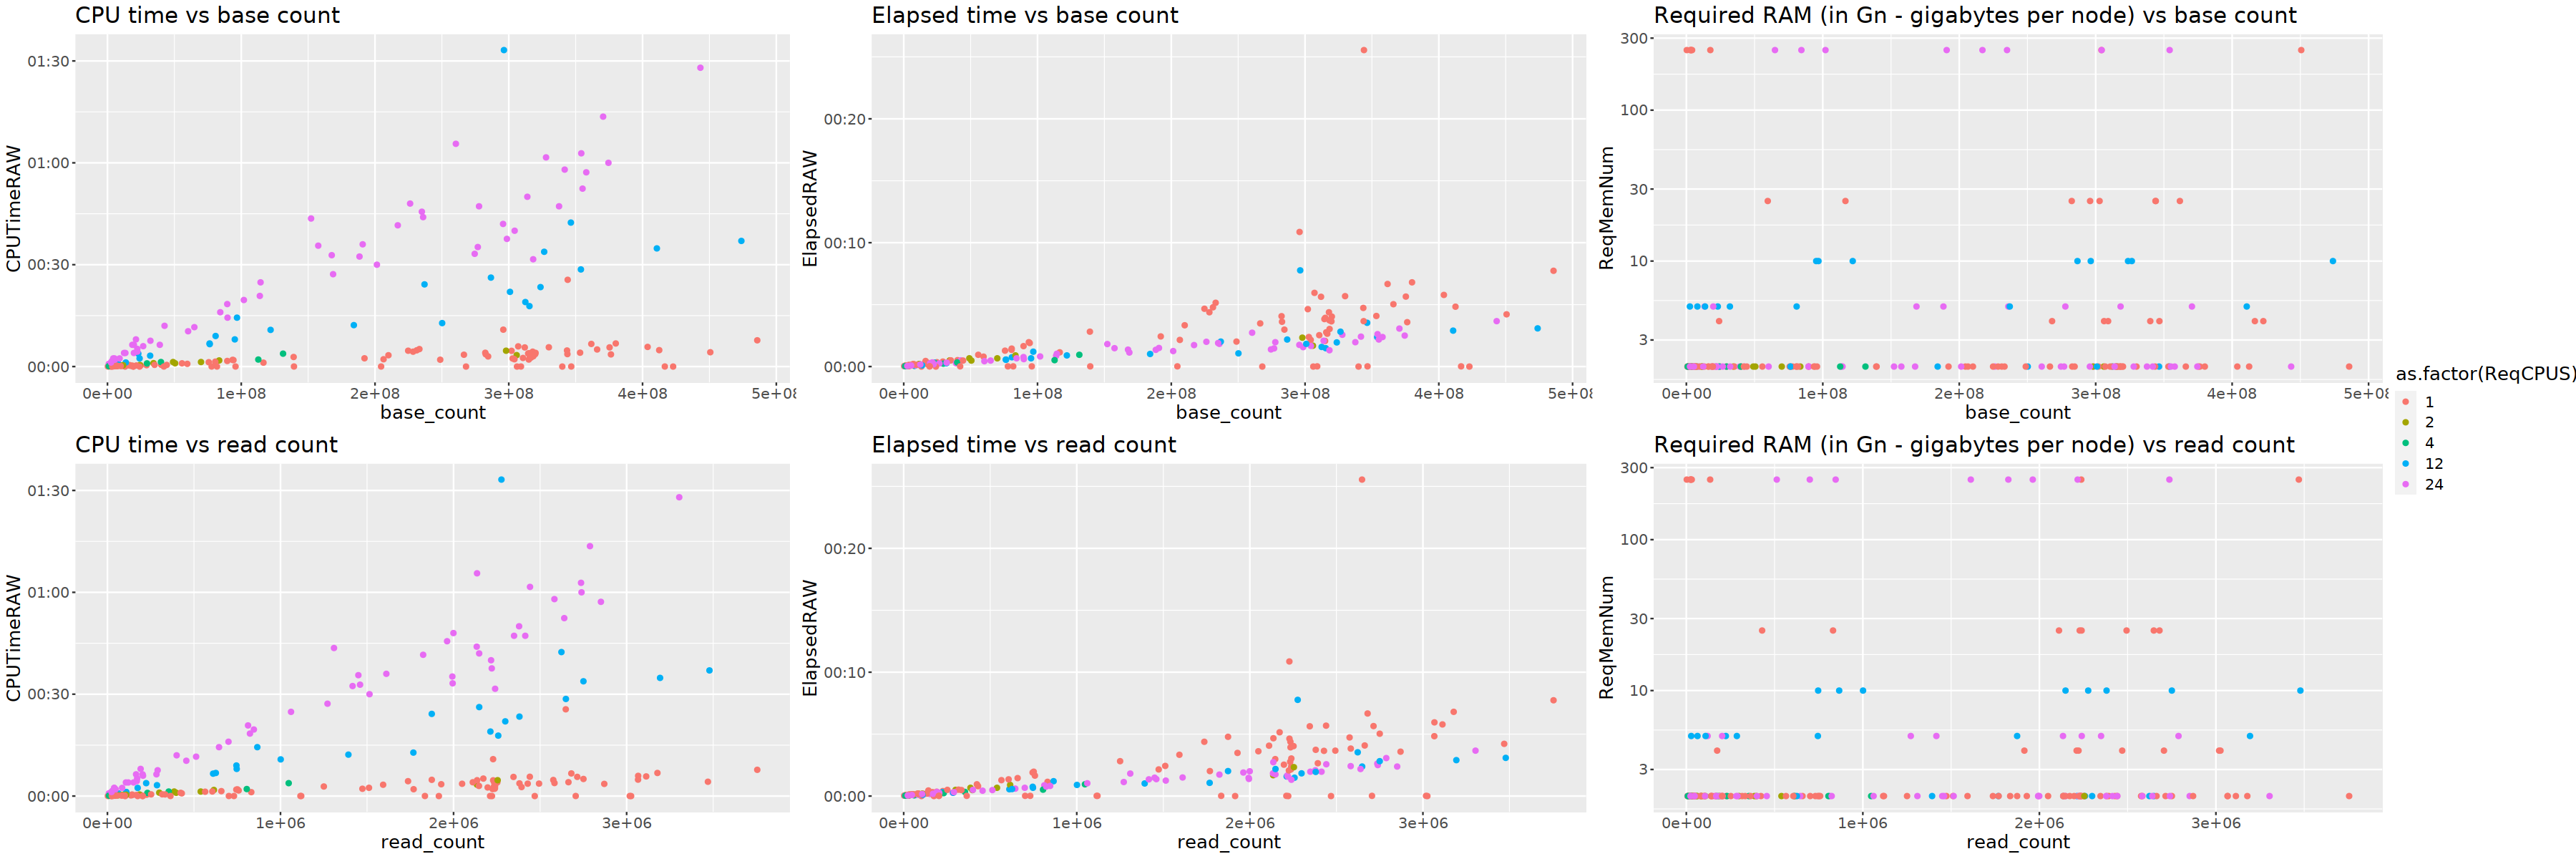

In [48]:
p1 <- ggplot(cpu) +
    geom_point(aes(x = base_count, y = CPUTimeRAW, color = as.factor(ReqCPUS))) +
    ggtitle("CPU time vs base count")
p2 <- ggplot(cpu) +
    geom_point(aes(x = base_count, y = ElapsedRAW, color = as.factor(ReqCPUS))) +
    ggtitle("Elapsed time vs base count")
p3 <- ggplot(cpu) +
    geom_point(aes(x = base_count, y = ReqMemNum, color = as.factor(ReqCPUS))) +
    ggtitle("Required RAM (in Gn - gigabytes per node) vs base count") +
    scale_y_log10()
p4 <- ggplot(cpu) +
    geom_point(aes(x = read_count, y = CPUTimeRAW, color = as.factor(ReqCPUS))) +
    ggtitle("CPU time vs read count")
p5 <- ggplot(cpu) +
    geom_point(aes(x = read_count, y = ElapsedRAW, color = as.factor(ReqCPUS))) +
    ggtitle("Elapsed time vs read count")
p6 <- ggplot(cpu) +
    geom_point(aes(x = read_count, y = ReqMemNum, color = as.factor(ReqCPUS))) +
    ggtitle("Required RAM (in Gn - gigabytes per node) vs read count") +
    scale_y_log10()

ggarrange(p1, p2, p3, p4, p5, p6, ncol = 3, nrow = 2, common.legend = T, legend = 'right')

In [49]:
print("Amount of RAM required for 1M reads")
# hist(cpu[, ReqMemNum/(read_count/1000000)])
median(cpu[, ReqMemNum/(read_count/1e6)])

[1] "Amount of RAM required for 1M reads"


[1] 4.392573

In [50]:
print("CPU time required for 1M reads")
# hist(cpu[, ReqCPUS/(read_count/1000000)])
median(cpu[, ReqCPUS/(read_count/1e6)])

[1] "CPU time required for 1M reads"


[1] 8.607685

**4. Using the NT RefSeq DB with blastn**

**SWITCH TO BASH ENV**

In [1]:
cd /shared/home/rgrochowski/medbioinfo_folder/radoslaw/MedBioinfo/analyses/blastn

In [3]:
# evalue 10e-6
sbatch ../../scripts/fastq_subsamples_blastn_vs_refseq_sbatch_DB.sh

Submitted batch job 33808753


In [4]:
squeue -u rgrochowski

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          33806096      fast  jupyter rgrochow  R    5:06:50      1 cpu-node-37
        33808753_1      fast MedBioin rgrochow  R       0:01      1 cpu-node-15
        33808753_2      fast MedBioin rgrochow  R       0:01      1 cpu-node-80
        33808753_3      fast MedBioin rgrochow  R       0:01      1 cpu-node-76
        33808753_4      fast MedBioin rgrochow  R       0:01      1 cpu-node-76
        33808753_5      fast MedBioin rgrochow  R       0:01      1 cpu-node-4
        33808753_6      fast MedBioin rgrochow  R       0:01      1 cpu-node-4
        33808753_7      fast MedBioin rgrochow  R       0:01      1 cpu-node-4
        33808753_8      fast MedBioin rgrochow  R       0:01      1 cpu-node-4


In [2]:
sacct -j 33808753 -P --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
    | grep ERR >| blastn_full_FASTQ_sbatch_vs_refseq_array_db.sacct
cat blastn_full_FASTQ_sbatch_vs_refseq_array_db.sacct
#cat blastn_full_FASTQ_vs_viral_sbatch_array.sacct | cut -d'|' -f 2 | tr -s '\n' ','

33808753_1.0|ERR6913112|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:27|1445|14450|24393540K|cpu-node-15
33808753_2.0|ERR6913113|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:26|1267|12670|25031116K|cpu-node-80
33808753_3.0|ERR6913320|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:28|1339|13390|24838520K|cpu-node-76
33808753_4.0|ERR6913209|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:27|1341|13410|24734540K|cpu-node-76
33808753_5.0|ERR6913122|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:27|1179|11790|25167568K|cpu-node-4
33808753_6.0|ERR6913208|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:26|1180|11800|25062620K|cpu-node-4
33808753_7.0|ERR6913218|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:26|1181|11810|25178432K|cpu-node-4
33808753_8.0|ERR6913349|10|50Gn||COMPLETED|0:0|2023-06-15T19:21:26|1181|11810|25057120K|cpu-node-4


**5. Benchmark to estimate cpu.hours, etc.**

**Switch to R env.**

In [1]:
# Load required packages
library(DBI)
library(data.table)
library(ggplot2)
library(ggpubr)
library(scales)

options(repr.plot.width = 30, repr.plot.height = 10)
theme_set(theme(text = element_text(size = 15)))

In [2]:
# Import the relevant data from the common database.
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
#cpu <-dbGetQuery(mydb, 'select JobName,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc from blastn_viral_resources_used \
#cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')
smpl <-dbGetQuery(mydb, 'select * from  sample_annot;')
setDT(smpl)

In [3]:
# Load the table to get the column names and the used resources data
names <- dbGetQuery(mydb, 'PRAGMA table_info(blastn_viral_resources_used);')$name
cpu0 <- fread("/shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/blastn/blastn_full_FASTQ_sbatch_vs_refseq_array_db.sacct")
colnames(cpu0) <- names
cpu0[, ReqMemNum := as.numeric(sub("Gn", '', ReqMem))]

In [4]:
#inner join the data.tables to get read and base counts (etc.) with their respective resources

cpu <- merge(cpu0, smpl, by.x = 'JobName', by.y = 'run_accession')

In [5]:
# Estimate of time in seconds per read in my run
# CPU time (median, mead)
median(cpu[, CPUTimeRAW/(read_count)])
cpu_time <- mean(cpu[, CPUTimeRAW/(read_count)])
cpu_time
# Elapsed time (median, mead)
median(cpu[, ElapsedRAW/(read_count)])
mean(cpu[, ElapsedRAW/(read_count)])

[1] 0.04892027

[1] 0.1173731

[1] 0.004892027

[1] 0.01173731

In [6]:
# Estimate of time in hours per read if all of common data was to be run
cpu_time*smpl[, sum(read_count)]/512/3600

[1] 20.02556

**Checking the exit status of jobs**

**Change the env to BASH**

In [3]:
sacct -P --format=JobID%20,JobName%18,State,ExitCode -S 2023-05-29 | head

JobID|JobName|State|ExitCode
33577894|jupyter|TIMEOUT|0:0
33577894.batch|batch|CANCELLED|0:15
33577894.0|batchspawner-singleuser|FAILED|1:0
33579241|xargs|COMPLETED|0:0
33579412|flash2|COMPLETED|0:0
33579475|flash2|COMPLETED|0:0
33580081_1|MedBioinfo|COMPLETED|0:0
33580081_1.batch|batch|COMPLETED|0:0
33580081_2|MedBioinfo|COMPLETED|0:0


## Day 2 PM
### Kraken2
- exact k-mer matches (not alignments) to db
- binary reference database
- much faster than blast
- taxonomic composition of a sample without a list of homologues
- when blast relies on real alignments, kraken is an alignment-free method - exact kmers
- k-mere approach
    - 300nt read length is cut into smaller, 30nt parts which are easier to align 
    - every 35-mer in the binary DB is assigned a LCA - last common ancestor (e.g. NCBI taxid)
    - query sequence is broken up into k-mers as well  and checked with the DB
	    - each read is assigned to a ID 

In [6]:
cd /shared/home/rgrochowski/medbioinfo_folder/radoslaw/MedBioinfo/analyses/
mkdir kraken2
cd kraken2
module load kraken2

mkdir: cannot create directory ‘kraken2’: File exists


In [202]:
#ERR6913349 - most reads
sbatch /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/scripts/fastq_subset_kraken2_sbatch.sh

Submitted batch job 33594016


In [8]:
squeue -u rgrochowski

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          33816031      fast  jupyter rgrochow  R      53:37      1 cpu-node-66


In [ ]:
cat kraken2_report.tsv

  5.16	82358	82358	U	0	unclassified
 94.84	1514240	222	R	1	root
 94.82	1513965	496	R1	131567	  cellular organisms
 94.63	1510884	25163	D	2	    Bacteria
 48.15	768712	42	D1	1783270	      FCB group
 48.14	768653	28	D2	68336	        Bacteroidetes/Chlorobi group
 48.14	768593	3068	P	976	          Bacteroidota
 46.61	744109	2626	C	200643	            Bacteroidia
 46.44	741421	10889	O	171549	              Bacteroidales
 39.47	630130	18705	F	171552	                Prevotellaceae
 37.65	601175	271015	G	838	                  Prevotella
 14.90	237936	237934	S	28132	                    Prevotella melaninogenica
  0.00	2	2	S1	553174	                      Prevotella melaninogenica ATCC 25845
  1.36	21784	21784	S	470565	                    Prevotella histicola
  1.08	17174	17174	S	1177574	                    Prevotella jejuni
  0.91	14478	1186	G1	2638335	                    unclassified Prevotella
  0.53	8402	0	S	652716	                      Prevotella sp. oral taxon 299
  0.53	8402	8402	S1	575614	  

## DAY 3 AM SLURM sbatch III : bracken abundance estimates
### Bracken
 **Makes Kraken2 results readable**

In [7]:
sbatch /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/scripts/fastq_subset_bracken_sbatch.sh

Submitted batch job 33594281


In [24]:
squeue -u rgrochowski

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          33587358      fast  jupyter rgrochow  R    6:10:25      1 cpu-node-43
        33594281_2      fast fastq_su rgrochow  R       3:16      1 cpu-node-11
        33594281_3      fast fastq_su rgrochow  R       3:16      1 cpu-node-80
        33594281_4      fast fastq_su rgrochow  R       3:16      1 cpu-node-74
        33594281_8      fast fastq_su rgrochow  R       3:16      1 cpu-node-76


In [2]:
sacct -j 33594281  --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
| grep bracken

   33594281_1.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:07:50          1          1      1048K     cpu-node-42 
   33594281_2.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:08:35          1          1      1048K     cpu-node-11 
   33594281_3.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:08:51          1          1       992K     cpu-node-80 
   33594281_4.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:09:05          0          0       952K     cpu-node-74 
   33594281_5.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:07:09          0          0      1048K      cpu-node-7 
   33594281_6.1         rg_bracken        1       90Gn             COMPLETED      0:0 2023-05-30T17:07:44          1          1      1052K     cpu-node-57 
   33594281_7.1         rg_bracken        1       90Gn          

In [3]:
sort --key 1 -t $'\t' -nr  kraken2_bracken_report.tsv | head -20

100.00	1505101	0	R	1	root
100.00	1505086	0	R1	131567	  cellular organisms
99.85	1502818	0	D	2	    Bacteria
51.18	770321	0	P	976	          Bacteroidota
51.18	770321	0	D2	68336	        Bacteroidetes/Chlorobi group
51.18	770321	0	D1	1783270	      FCB group
49.83	750025	0	C	200643	            Bacteroidia
49.83	749955	0	O	171549	              Bacteroidales
42.78	643853	0	F	171552	                Prevotellaceae
41.97	631650	0	G	838	                  Prevotella
36.33	546835	0	P	1224	      Pseudomonadota
30.59	460396	460396	S	28132	                    Prevotella melaninogenica
25.42	382557	0	C	28216	        Betaproteobacteria
23.89	359547	0	O	206351	          Neisseriales
23.89	359519	0	F	481	            Neisseriaceae
23.26	350151	0	G	482	              Neisseria
10.88	163702	0	C	1236	        Gammaproteobacteria
9.33	140360	140360	S	488	                Neisseria mucosa
9.22	138763	0	O	135625	          Pasteurellales
9.22	138763	0	F	712	            Pasteurellaceae


In [2]:
sort --key 1 -t $'\t' -nr  kraken2_bracken_report.tsv | grep 9606                                                     

0.02	269	269	S	9606	                                                              Homo sapiens


In [14]:
head -3 outputs_kraken/*err

==> outputs_kraken/slurm.33594281.1.err <==
Loading database information... done.
1596598 sequences (410.70 Mbp) processed in 94.803s (1010.5 Kseq/m, 259.93 Mbp/m).
  1514240 sequences classified (94.84%)

==> outputs_kraken/slurm.33594281.2.err <==
Loading database information... done.
1596598 sequences (410.70 Mbp) processed in 103.982s (921.3 Kseq/m, 236.98 Mbp/m).
  1514240 sequences classified (94.84%)

==> outputs_kraken/slurm.33594281.3.err <==
Loading database information... done.
1596598 sequences (410.70 Mbp) processed in 72.791s (1316.0 Kseq/m, 338.53 Mbp/m).
  1514240 sequences classified (94.84%)

==> outputs_kraken/slurm.33594281.4.err <==
Loading database information... done.
1596598 sequences (410.70 Mbp) processed in 57.020s (1680.1 Kseq/m, 432.17 Mbp/m).
  1514240 sequences classified (94.84%)

==> outputs_kraken/slurm.33594281.5.err <==
Loading database information... done.
1596598 sequences (410.70 Mbp) processed in 55.155s (1736.9 Kseq/m, 446.78 Mbp/m).
  1514240 s

## Bracken with all files

In [10]:
sbatch /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/scripts/fastq_bracken_sbatch.sh

Submitted batch job 33598430


In [1]:
squeue -u rgrochowski
# 33598430

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          33597477      fast  jupyter rgrochow  R    3:12:02      1 cpu-node-67
        33600931_1      fast fastq_kr rgrochow  R       5:58      1 cpu-node-47
        33600931_2      fast fastq_kr rgrochow  R       5:58      1 cpu-node-72
        33600931_3      fast fastq_kr rgrochow  R       5:58      1 cpu-node-73
        33600931_4      fast fastq_kr rgrochow  R       5:58      1 cpu-node-74
        33600931_5      fast fastq_kr rgrochow  R       5:58      1 cpu-node-75
        33600931_6      fast fastq_kr rgrochow  R       5:58      1 cpu-node-76
        33600931_7      fast fastq_kr rgrochow  R       5:58      1 cpu-node-77
        33600931_8      fast fastq_kr rgrochow  R       5:58      1 cpu-node-78


In [ ]:
sacct -j 33598430 --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
| grep bracken

In [3]:
sort --key 1 -t $'\t' -nr  all/*kraken2_bracken_report.tsv | head -20

100.00	89612	0	R	1	root
100.00	523040	0	R	1	root
100.00	45753	0	R	1	root
100.00	3187	0	R	1	root
100.00	174424	0	R	1	root
100.00	1505101	0	R	1	root
100.00	1505086	0	R1	131567	  cellular organisms
100.00	11071	0	R	1	root
100.00	10594	0	R	1	root
99.93	522697	0	R1	131567	  cellular organisms
99.89	174231	0	R1	131567	  cellular organisms
99.89	11059	0	R1	131567	  cellular organisms
99.85	1502818	0	D	2	    Bacteria
99.57	173677	0	D	2	    Bacteria
99.33	10522	0	R1	131567	  cellular organisms
99.29	519301	0	D	2	    Bacteria
99.25	3163	0	R1	131567	  cellular organisms
98.29	88080	0	R1	131567	  cellular organisms
98.18	10870	0	D	2	    Bacteria
97.88	44785	0	R1	131567	  cellular organisms
sort: write failed: standard output: Broken pipe
sort: write error


In [5]:
sort --key 1 -t $'\t' -nr  all/*kraken2_bracken_report.tsv | grep 9606                                                     

5.38	569	569	S	9606	                                                              Homo sapiens
2.24	71	71	S	9606	                                                              Homo sapiens
1.54	170	170	S	9606	                                                              Homo sapiens
0.44	202	202	S	9606	                                                              Homo sapiens
0.29	506	506	S	9606	                                                              Homo sapiens
0.16	850	850	S	9606	                                                              Homo sapiens
0.15	134	134	S	9606	                                                              Homo sapiens
0.02	269	269	S	9606	                                                              Homo sapiens


## Krona plots
- can be opened as an interactive plot in jupyter in a new tab with a link

In [8]:
# on single report
cd /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/krona
/shared/projects/2314_medbioinfo/kraken2/KrakenTools/kreport2krona.py -r ../kraken2/kraken2_bracken_report.tsv -o ./kraken2_krona.out
/shared/projects/2314_medbioinfo/kraken2/bin/ktImportText -o ./kraken2_krona.html ./kraken2_krona.out  

Writing ./kraken2_krona.html...


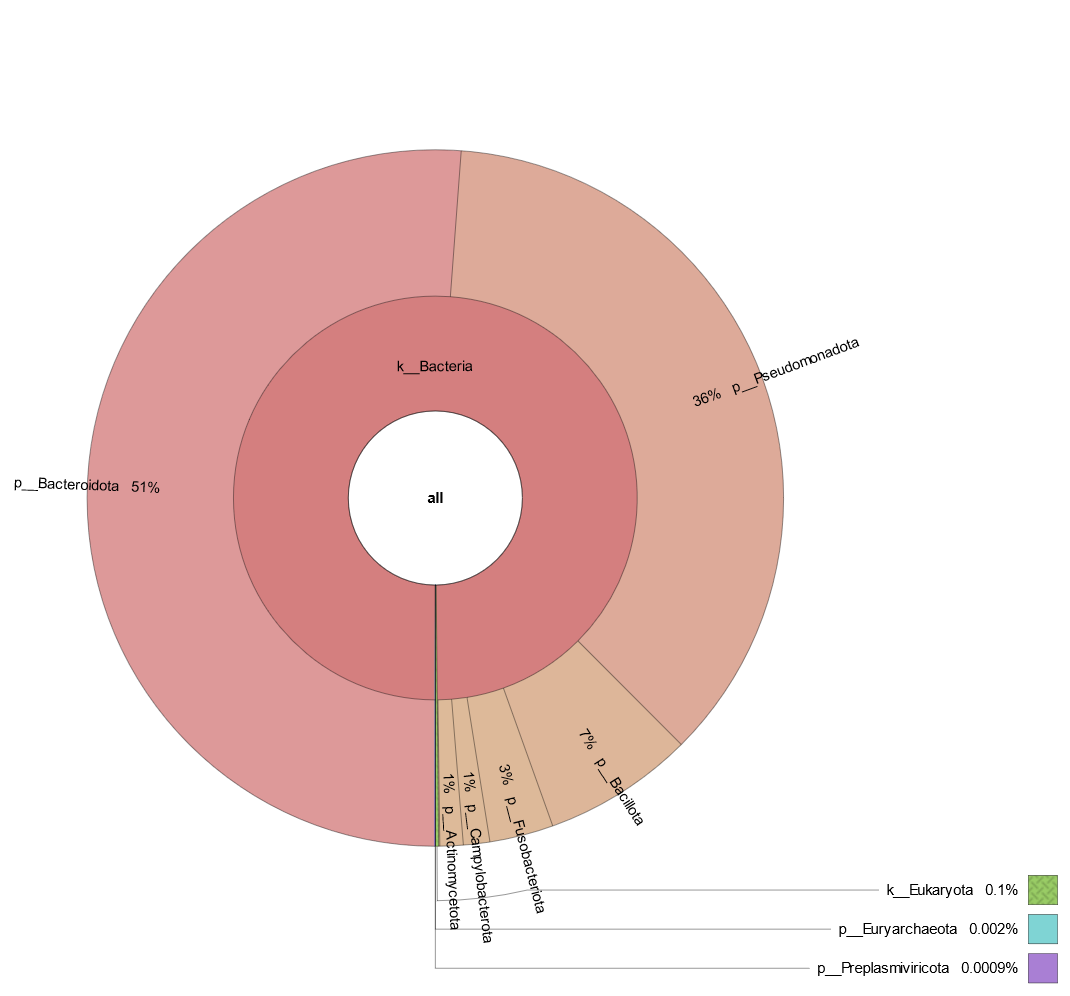

In [9]:
cat kraken2_krona.out | head | sed -E "s/.{1}__//g" # sed -E!!!!
# sed -Ei "s/.{1}__//g" kr.out #infile editing

cat: write error0	Bacteria
: Broken pipe0	Bacteria	Bacteroidota

0	Bacteria	Bacteroidota	Bacteroidia
0	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales
0	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae
0	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae	Prevotella
460396	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae	Prevotella	Prevotella_melaninogenica
31711	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae	Prevotella	Prevotella_histicola
11166	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae	Prevotella	Prevotella_sp._oral_taxon_299
3078	Bacteria	Bacteroidota	Bacteroidia	Bacteroidales	Prevotellaceae	Prevotella	Prevotella_sp._E15-22


### Arrayed Kraken2, Bracken and Krona

In [4]:
sbatch /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/scripts/fastq_krona_sbatch.sh

Submitted batch job 33600931


In [5]:
squeue -u rgrochowski
#33600931

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
    33600931_[1-8]      fast fastq_kr rgrochow PD       0:00      1 (None)
          33597477      fast  jupyter rgrochow  R    3:05:45      1 cpu-node-67


In [62]:
# sacct -j 33599070 --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
#    | grep ERR >| fastq_krona_vs_db_sbatch.sacct
    #cat fastq_krona_vs_db_sbatch.sacct

          JobID            JobName  ReqCPUS     ReqMem  Timelimit      State ExitCode               Start ElapsedRaw CPUTimeRAW     MaxRSS        NodeList 
--------------- ------------------ -------- ---------- ---------- ---------- -------- ------------------- ---------- ---------- ---------- --------------- 
     33599070_1 fastq_krona_vs_db+       16       80Gn   00:15:00  COMPLETED      0:0 2023-05-31T10:47:25        194       3104                 cpu-node-6 
33599070_1.bat+              batch       16       80Gn             COMPLETED      0:0 2023-05-31T10:47:25        194       3104      7912K      cpu-node-6 
   33599070_1.0 ERR6913112_rg_kra+       16       80Gn             COMPLETED      0:0 2023-05-31T10:47:25        193       3088  67443700K      cpu-node-6 
   33599070_1.1 ERR6913112_rg_bra+       16       80Gn             COMPLETED      0:0 2023-05-31T10:50:38          0          0      1236K      cpu-node-6 
   33599070_1.2 ERR6913112_rg_kro+       16       80Gn          

## Merge krona piecharts

In [63]:
cd /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/krona
/shared/projects/2314_medbioinfo/kraken2/bin/ktImportText -o all_kraken2_krona.html ./*kraken2_krona.out 

Writing all_kraken2_krona.html...


## Day 3 - PM: Explore the microbiome biodiversity across a compilation of all 250 samples

In [2]:
cd /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/krona
sacct -j 33600931 -P --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList  \
    | grep ERR >| fastq_krona_vs_db_sbatch_sql.sacct
cat fastq_krona_vs_db_sbatch_sql.sacct

33600931_1.0|ERR6913112|16|80Gn||COMPLETED|0:0|2023-05-31T12:08:12|465|7440|70408444K|cpu-node-47
33600931_1.1|ERR6913112_rg_bracken|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:57|0|0|1244K|cpu-node-47
33600931_1.2|ERR6913112_rg_krona1|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:57|0|0|1244K|cpu-node-47
33600931_1.3|ERR6913112_rg_krona2|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:57|1|16|1244K|cpu-node-47
33600931_2.0|ERR6913113|16|80Gn||COMPLETED|0:0|2023-05-31T12:08:11|438|7008|70735076K|cpu-node-72
33600931_2.1|ERR6913113_rg_bracken|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:30|0|0|1144K|cpu-node-72
33600931_2.2|ERR6913113_rg_krona1|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:30|0|0|1136K|cpu-node-72
33600931_2.3|ERR6913113_rg_krona2|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:30|1|16|1140K|cpu-node-72
33600931_3.0|ERR6913320|16|80Gn||COMPLETED|0:0|2023-05-31T12:08:11|466|7456|72199860K|cpu-node-73
33600931_3.1|ERR6913320_rg_bracken|16|80Gn||COMPLETED|0:0|2023-05-31T12:15:57|1|16|1136K|cpu-node-73
3360093

In [5]:
 # sqlite3 -batch -separator "|" /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
  # ".import ./fastq_krona_vs_db_sbatch_sql.sacct kraken2_viral_resources_used"

In [6]:
#sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db "select * from kraken2_viral_resources_used where JobID like '33600931%';"

┌──────────────┬───────────────────────┬─────────┬────────┬───────────┬───────────┬──────────┬─────────────────────┬────────────┬────────────┬───────────┬─────────────┐
│    JobID     │        JobName        │ ReqCPUS │ ReqMem │ Timelimit │   State   │ ExitCode │        Start        │ ElapsedRAW │ CPUTimeRAW │  MaxRSS   │  NodeList   │
├──────────────┼───────────────────────┼─────────┼────────┼───────────┼───────────┼──────────┼─────────────────────┼────────────┼────────────┼───────────┼─────────────┤
│ 33600931_1.0 │ ERR6913112            │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T12:08:12 │ 465        │ 7440       │ 70408444K │ cpu-node-47 │
│ 33600931_1.1 │ ERR6913112_rg_bracken │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T12:15:57 │ 0          │ 0          │ 1244K     │ cpu-node-47 │
│ 33600931_1.2 │ ERR6913112_rg_krona1  │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T12:15:57 │ 0          │ 0          │ 1244K     │ 

In [20]:
#sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db "select * from kraken2_viral_resources_used;"

┌───────────────┬───────────────────────┬─────────┬────────┬───────────┬───────────┬──────────┬─────────────────────┬────────────┬────────────┬───────────┬─────────────┐
│     JobID     │        JobName        │ ReqCPUS │ ReqMem │ Timelimit │   State   │ ExitCode │        Start        │ ElapsedRAW │ CPUTimeRAW │  MaxRSS   │  NodeList   │
├───────────────┼───────────────────────┼─────────┼────────┼───────────┼───────────┼──────────┼─────────────────────┼────────────┼────────────┼───────────┼─────────────┤
│ 33576762_1.0  │ ERR6913174            │ 4       │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-28T20:18:46 │ 90         │ 360        │ 49486432K │ cpu-node-38 │
│ 33576762_2.0  │ ERR6913270            │ 4       │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-28T20:18:46 │ 125        │ 500        │ 72258600K │ cpu-node-88 │
│ 33576762_3.0  │ ERR6913175            │ 4       │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-28T20:19:14 │ 95         │ 380        │ 693734

In [19]:
#sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db "update kraken2_viral_resources_used set JobName = replace(JobName, '_rg_kraken2', '') where JobName like '%_rg_kraken2';"

### Benchmark kraken2

In [1]:
library(DBI)
library(data.table)
library(ggplot2)
library(scales)
library(plotly)
library(lubridate)

mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
#cpu <-dbGetQuery(mydb, 'select JobName,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc from blastn_viral_resources_used \
#cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')

cpu <-dbGetQuery(mydb, 'select * from kraken2_viral_resources_used cpu inner join sample_annot spl on cpu.JobName=spl.run_accession;')
cpu <- setDT(cpu)
#cpu[, CPUTimeRAW :=as.duration(CPUTimeRAW)]
cpu[, ':=' (CPUTimeRAW = as.ITime(CPUTimeRAW), ElapsedRAW = as.ITime(ElapsedRAW))]



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
head(cpu[, CPUTimeRAW])
head(cpu[, as.POSIXct(CPUTimeRAW)])

[1] "00:06:00" "00:08:20" "00:06:20" "00:16:28" "00:06:52" "00:06:04"

[1] "2023-06-16 00:06:00 UTC" "2023-06-16 00:08:20 UTC"
[3] "2023-06-16 00:06:20 UTC" "2023-06-16 00:16:28 UTC"
[5] "2023-06-16 00:06:52 UTC" "2023-06-16 00:06:04 UTC"

In [19]:
cpu[, .N]
colnames(cpu)
cpu[ReqCPUS == 1, .N]
cpu[, unique(State)]
cpu[State == 'CANCELLED']

bash: cpu[, .N]: command not found
(/shared/projects/2314_medbioinfo/conda/nextflow-env) bash: syntax error near unexpected token `cpu'
(/shared/projects/2314_medbioinfo/conda/nextflow-env) bash: cpu[ReqCPUS == 1, .N]: command not found
(/shared/projects/2314_medbioinfo/conda/nextflow-env) bash: cpu[, unique(State)]: command not found
(/shared/projects/2314_medbioinfo/conda/nextflow-env) bash: cpu[State == CANCELLED]: command not found
(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

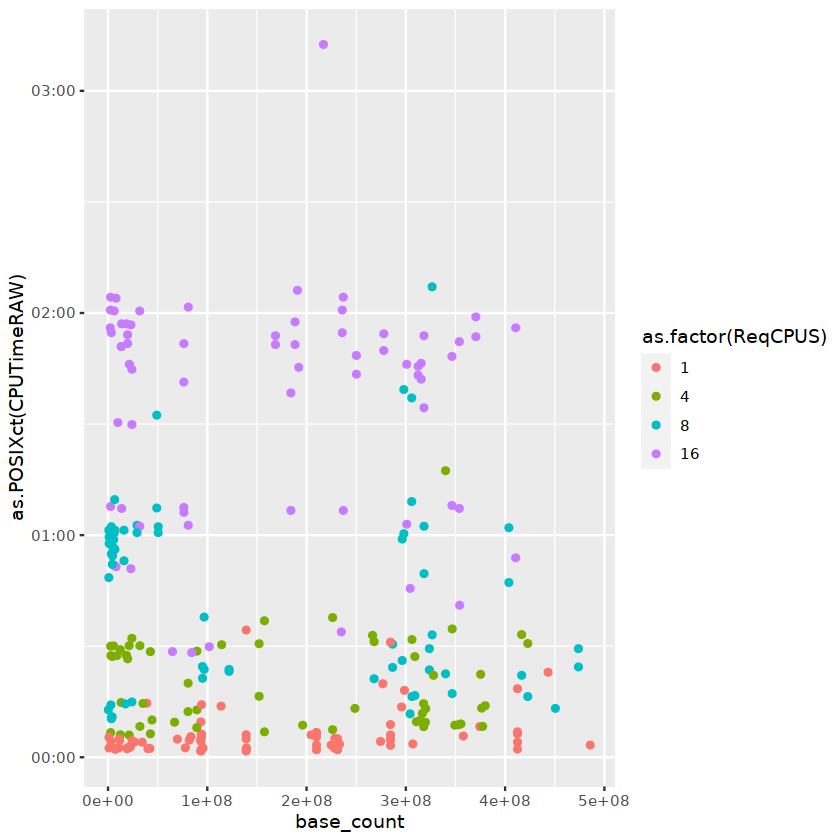

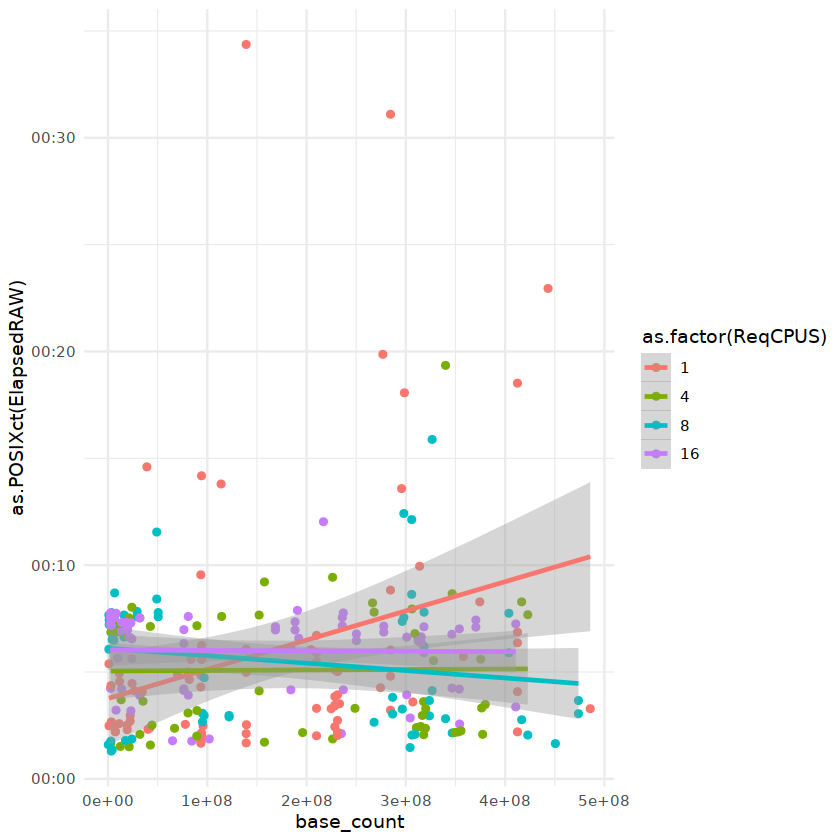

In [5]:
ggplot(cpu, aes(x = base_count, y = as.POSIXct(CPUTimeRAW), color = as.factor(ReqCPUS))) +
    geom_point()

ggplot(cpu, aes(x = base_count, y = as.POSIXct(ElapsedRAW), color = as.factor(ReqCPUS))) +
    geom_point() +
    geom_smooth(formula = y~x, method = 'lm') +
    theme_minimal()
    #scale_x_datetime(breaks = breaks_width("1 hour"), labels=date_format("%H:%M"))
#ggplot(cpu) +
 #   geom_point(aes(x = base_count, y = MaxRSS, color = host_disease_status)) +
  #  scale_y_log10()

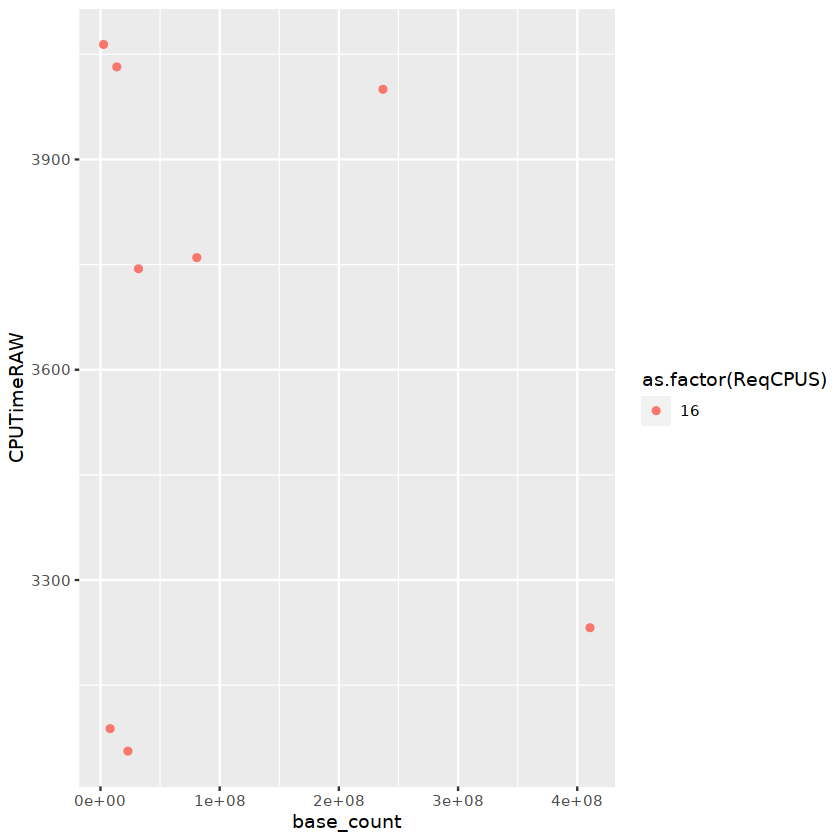

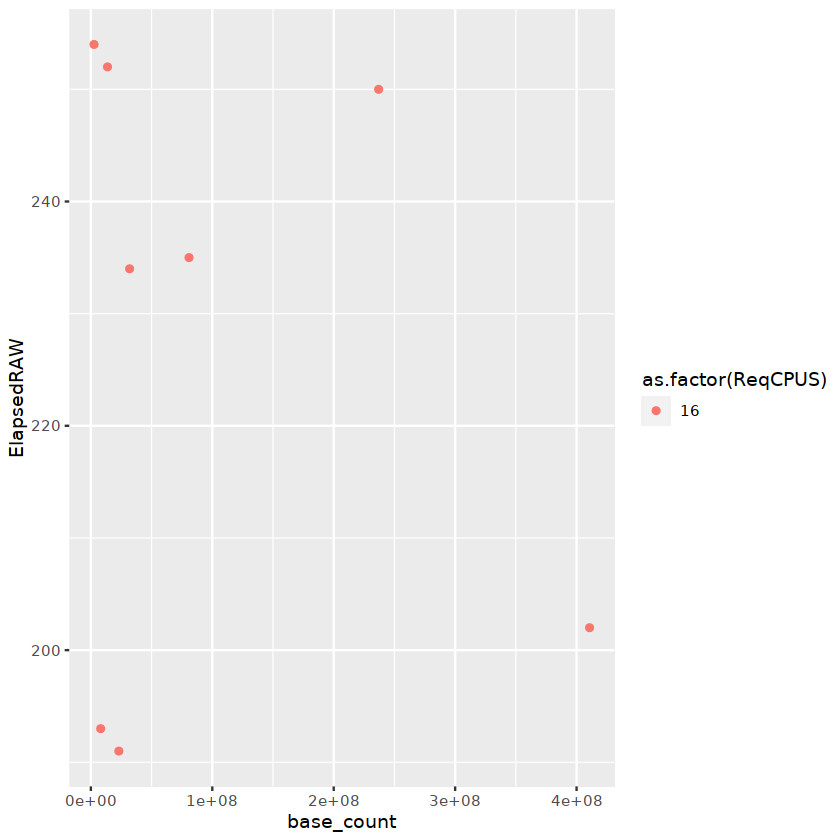

In [17]:
# MINE
ggplot(cpu[JobID %like% 33599070]) +
    geom_point(aes(x = base_count, y = CPUTimeRAW, color = as.factor(ReqCPUS))) 

ggplot(cpu[JobID %like% 33599070]) +
    geom_point(aes(x = base_count, y = ElapsedRAW, color = as.factor(ReqCPUS))) 

In [6]:
# gginnards' geom_null should allow to get the JobName on the ggplotly plot

#d1 <- ggplot(cpu) +
#    geom_point(aes(x = base_count, y = CPUTimeRAW, color = as.factor(ReqCPUS))) +
#    guides(shape = "none") +
#    gginnards::geom_null(aes(x = base_count, y = CPUTimeRAW, color = as.factor(ReqCPUS),  shape = as.factor(JobName)))


#d2 <- ggplot(cpu) +
 #   geom_point(aes(x = base_count, y = ElapsedRAW, color = as.factor(ReqCPUS), shape = as.factor(JobName))) +
 #   guides(shape = "none")
    
#ggplotly(d1)

ERROR: Error in loadNamespace(name): there is no package called ‘gginnards’


### MultiQC - add the kraken2 microbiome

In [3]:
cd /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses
module load multiqc

In [11]:
# krona was added
multiqc --force --title "rgrochowski all kraken2" ../data/merged_pairs/ ./fastqc/ ./rgrochowski_flash2.log ./bowtie/ ./kraken2/all/*_kraken2_bracken_report.tsv ./krona/ERR*_kraken2_krona.out


  /// ]8;id=19054;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.13

|           multiqc | MultiQC Version v1.14 now available!
|           multiqc | Report title: rgrochowski all kraken2
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/data/merged_pairs
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/fastqc
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/rgrochowski_flash2.log
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/bowtie
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/kraken2/all/ERR6913112_kraken2_bracken_report.tsv
|           multiqc | Search path : /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/kraken2/all/ERR6913113_kraken2_bracken_report.tsv
|           multiqc | Sea

## Compile all 250 sample abundance estimates in SQLite

In [15]:
# add accesion numbers to the bracken output making it possible to identify patient samples
rm -f bracken_combined.tsv bracken_combined_no_headers.tsv
xargs -a /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/rgrochowski_run_accessions.txt -I{} sed -E 's/^/{}\t/' \{}_kraken2_bracken.tsv >> bracken_combined.tsv
head bracken_combined.tsv
wc -l bracken_combined.tsv
echo "________________"
grep -v kraken_assigned_reads bracken_combined.tsv > bracken_combined_no_headers.tsv
head bracken_combined_no_headers.tsv
wc -l bracken_combined_no_headers.tsv
echo "________________"


ERROR: Error in parse(text = x, srcfile = src): <text>:2:7: unexpected symbol
1: # add accesion numbers to the bracken output making it possible to identify patient samples
2: rm -f bracken_combined.tsv
         ^


In [ ]:
#sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'CREATE TABLE IF NOT EXISTS "bracken_abundances_long" (
    "run_accesion" TEXT,
    "taxon_name" TEXT,
    "taxonomy_id" INTEGER,
    "taxonomy_lvl" TEXT,
    "kraken_assigned_reads" INTEGER,
    "added_reads" INTEGER,
    "new_est_reads" INTEGER,
    "fraction_total_reads" REAL,
    PRIMARY KEY (run_accession, taxonomy_id)
);
CREATE INDEX bracken_abundances_long

In [18]:
# Import the bracken results into the shared database

#cd /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/MedBioinfo/analyses/kraken2/all/
#sqlite3 -batch -tabs /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
#    ".import ./bracken_combined_no_headers.tsv bracken_abundances_long"

In [48]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db 'select count(distinct(run_accession)) from bracken_abundances_long ;'

#sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db 'select distinct(run_accession) from bracken_abundances_long ;'


-- Loading resources from /shared/home/rgrochowski/.sqliterc
count(distinct(run_accession))
------------------------------
158                           


In [44]:
cut -f 1 -d$'\t' bracken_combined_no_headers.tsv | sort | uniq | wc -l
cut -f 1 -d$'\t' bracken_combined_no_headers.tsv | sort | uniq -c

8
     81 ERR6913112
    153 ERR6913113
    459 ERR6913122
     37 ERR6913208
     33 ERR6913209
    182 ERR6913218
   1313 ERR6913320
    480 ERR6913349


**can you list the first 20 samples with highest SARS-CoV-2 abundance ?**

In [19]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db 'select * from bracken_abundances_long order by -new_est_reads limit 20;'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                     taxonomy_id  taxonomy_lvl  kraken_assigned_reads  added_reads  new_est_reads  fraction_total_reads
-------------  -----------------------------  -----------  ------------  ---------------------  -----------  -------------  --------------------
ERR6913314     Klebsiella pneumoniae          573          S             181553                 575058       756611         0.72546             
ERR6913342     Streptococcus agalactiae       1311         S             1804                   559205       561009         0.30568             
ERR6913322     Klebsiella pneumoniae          573          S             98611                  435542       534153         0.45093             
ERR6913343     Klebsiella pneumoniae          573          S             72888                  442199       515087         0.3004              
ERR6913181     Streptococcus salivarius       1304         S         

In [29]:
# sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db '.schema' | grep -B4 accession

-- Loading resources from /shared/home/rgrochowski/.sqliterc
  "Ct" REAL
);
CREATE INDEX index_CtValues_Ct ON CtValues(Ct);
CREATE TABLE IF NOT EXISTS "ENARunTable"(
  "study_accession" TEXT,
  "secondary_study_accession" TEXT,
  "sample_accession" TEXT,
  "secondary_sample_accession" TEXT,
  "experiment_accession" TEXT,
  "run_accession" TEXT NOT NULL PRIMARY KEY,
  "submission_accession" TEXT,
--
  "sample_title" TEXT,
  "nominal_sdev" TEXT,
  "first_created" TEXT
);
CREATE UNIQUE INDEX index_ENARunTable_sample_accession ON ENARunTable(sample_accession);
CREATE UNIQUE INDEX index_ENARunTable_secondary_sample_accession ON ENARunTable(secondary_sample_accession);
CREATE UNIQUE INDEX index_ENARunTable_experiment_accession ON ENARunTable(experiment_accession);
--
  "patient_code" TEXT NOT NULL,
  PRIMARY KEY (username, patient_code)
);
CREATE INDEX index_sample2bioinformatician_username ON sample2bioinformatician(username);
CREATE VIEW sample_annot_all as select * from ((SraRunTable sra 

In [31]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db '.tables'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
CtValues                          bracken_abundances_long;        
ENARunTable                       kraken2_viral_resources_used    
SampleOverviews                   kraken2_viral_resources_used_2  
SraRunTable                       kraken2_viral_resources_used_bak
bioinformaticians                 sample2bioinformatician         
blastn_viral_resources_used       sample_annot                    
bracken_abundances_long           sample_annot_all                


**can you see a relationship between SARS-CoV-2 abundance and Ct values ?**

In [52]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name like "%corona%" order by -fraction_total_reads limit 20;'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                                             taxonomy_id  kraken_assigned_reads  fraction_total_reads  Ct   
-------------  -----------------------------------------------------  -----------  ---------------------  --------------------  -----
ERR6913216     Severe acute respiratory syndrome-related coronavirus  694009       7797                   0.77822               17.99
ERR6913199     Severe acute respiratory syndrome-related coronavirus  694009       439                    0.7569                18.81
ERR6913221     Severe acute respiratory syndrome-related coronavirus  694009       4360                   0.73823               17.88
ERR6913210     Severe acute respiratory syndrome-related coronavirus  694009       6142                   0.41324               19.52
ERR6913214     Severe acute respiratory syndrome-related coronavirus  694009       4573                   0.38784               17.81
E

**can you check if SARS-CoV-2 is present in rtPCR negative patients ?**

In [1]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status   from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name like "%Severe acute respiratory%" order by -fraction_total_reads limit 20;'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                                             taxonomy_id  kraken_assigned_reads  fraction_total_reads  Ct     host_disease_status
-------------  -----------------------------------------------------  -----------  ---------------------  --------------------  -----  -------------------
ERR6913216     Severe acute respiratory syndrome-related coronavirus  694009       7797                   0.77822               17.99  SARS-CoV-2 positive
ERR6913199     Severe acute respiratory syndrome-related coronavirus  694009       439                    0.7569                18.81  SARS-CoV-2 positive
ERR6913221     Severe acute respiratory syndrome-related coronavirus  694009       4360                   0.73823               17.88  SARS-CoV-2 positive
ERR6913210     Severe acute respiratory syndrome-related coronavirus  694009       6142                   0.41324               19.52  SARS-CoV-2 positive
ERR691321

**is SARS-CoV-2 only ever seen in RNA samples (ie not in DNA samples) ?**

In [16]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status,  nuc  from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name like "%corona%" order by -fraction_total_reads limit 20;' 
echo ________________________________________________________________________________________________________________
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status,  nuc  from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name like "%corona%" and nuc like "DNA" order by -fraction_total_reads limit 20;' 

-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                                             taxonomy_id  kraken_assigned_reads  fraction_total_reads  Ct     host_disease_status  nuc
-------------  -----------------------------------------------------  -----------  ---------------------  --------------------  -----  -------------------  ---
ERR6913216     Severe acute respiratory syndrome-related coronavirus  694009       7797                   0.77822               17.99  SARS-CoV-2 positive  RNA
ERR6913199     Severe acute respiratory syndrome-related coronavirus  694009       439                    0.7569                18.81  SARS-CoV-2 positive  RNA
ERR6913221     Severe acute respiratory syndrome-related coronavirus  694009       4360                   0.73823               17.88  SARS-CoV-2 positive  RNA
ERR6913210     Severe acute respiratory syndrome-related coronavirus  694009       6142                   0.41324               19.52  SARS

**what are the 10 most ubiquitous human pathogens found in the 125 patients ? There is list known to be associated with upper airways and oral/nasal cavities in study supp tables 3 & 4 (in your docs folder)? (list from assignment's script)**

In [6]:
# select distinc taxon names from this query
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select taxon_name, avg(fraction_total_reads) from (select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status,  nuc  from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name in ('Dolosigranulum pigrum','Haemophilus influenzae', 'Haemophilus parainfluenzae',
'Klebsiella pneumoniae','Streptococcus pneumoniae','Staphylococcus aureus','Influenza A virus',
 'Severe acute respiratory syndrome-related coronavirus', 'Chlamydia pneumoniae',
'Haemophilus parainfluenzae','Serratia marcescens','Enterobacter hormaechei', 
'Enterobacter cloacae', 'Enterobacter asburiae','Burkholderia multivorans',
'Human coronavirus HKU1','Human coronavirus NL63','Rhinovirus A')) group by taxon_name order by -avg(fraction_total_reads) limit 10;" 


-- Loading resources from /shared/home/rgrochowski/.sqliterc
taxon_name                                             avg(fraction_total_reads)
-----------------------------------------------------  -------------------------
Influenza A virus                                      0.9718                   
Chlamydia pneumoniae                                   0.0736616666666667       
Severe acute respiratory syndrome-related coronavirus  0.0662358208955224       
Klebsiella pneumoniae                                  0.0321947058823529       
Haemophilus influenzae                                 0.0296727118644068       
Human coronavirus NL63                                 0.02909                  
Streptococcus pneumoniae                               0.0286963432835821       
Staphylococcus aureus                                  0.019528275862069        
Dolosigranulum pigrum                                  0.0160473333333333       
Burkholderia multivorans                        

In [92]:
# select distinc taxon names from this query
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select run_accession, taxon_name, count(taxon_name) from (select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status,  nuc  from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name in ('Dolosigranulum pigrum','Haemophilus influenzae', 'Haemophilus parainfluenzae',
'Klebsiella pneumoniae','Streptococcus pneumoniae','Staphylococcus aureus','Influenza A virus',
 'Severe acute respiratory syndrome-related coronavirus','Chlamydia pneumoniae',
'Haemophilus parainfluenzae','Serratia marcescens','Enterobacter hormaechei', 
'Enterobacter cloacae', 'Enterobacter asburiae','Burkholderia multivorans',
'Human coronavirus HKU1','Human coronavirus NL63','Rhinovirus A' )) group by taxon_name order by -count(taxon_name);" 

-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                                             count(taxon_name)
-------------  -----------------------------------------------------  -----------------
ERR6913320     Haemophilus parainfluenzae                             128              
ERR6913112     Streptococcus pneumoniae                               127              
ERR6913320     Haemophilus influenzae                                 114              
ERR6913320     Staphylococcus aureus                                  110              
ERR6913112     Burkholderia multivorans                               105              
ERR6913112     Dolosigranulum pigrum                                  99               
ERR6913320     Klebsiella pneumoniae                                  98               
ERR6913209     Severe acute respiratory syndrome-related coronavirus  63               
ERR6913320     Serratia marcescens                         

In [9]:
# all the results
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select run_accession, taxon_name, taxonomy_id, kraken_assigned_reads, fraction_total_reads, Ct, host_disease_status,  nuc  from 
(select *  from bracken_abundances_long left outer join (select * from CtValues 
left outer join  sample_annot on sample_annot.patient_code =  CtValues.Blinded_number) using(run_accession)) 
where taxon_name in ('Dolosigranulum pigrum','Haemophilus influenzae', 'Haemophilus parainfluenzae',
'Klebsiella pneumoniae','Streptococcus pneumoniae','Staphylococcus aureus','Influenza A virus',
 'Severe acute respiratory syndrome-related coronavirus','Chlamydia pneumoniae',
'Haemophilus parainfluenzae','Serratia marcescens','Enterobacter hormaechei', 
'Enterobacter cloacae', 'Enterobacter asburiae','Burkholderia multivorans',
'Human coronavirus HKU1','Human coronavirus NL63','Rhinovirus A')  order by -fraction_total_reads ;"



-- Loading resources from /shared/home/rgrochowski/.sqliterc
run_accession  taxon_name                                             taxonomy_id  kraken_assigned_reads  fraction_total_reads  Ct     host_disease_status  nuc
-------------  -----------------------------------------------------  -----------  ---------------------  --------------------  -----  -------------------  ---
ERR6913154     Haemophilus influenzae                                 727          12529                  0.9819                0.0    SARS-CoV-2 negative  DNA
ERR6913269     Influenza A virus                                      11320        11614                  0.9718                0.0    SARS-CoV-2 negative  RNA
ERR6913264     Haemophilus influenzae                                 727          1584                   0.9212                0.0    SARS-CoV-2 negative  RNA
ERR6913250     Haemophilus influenzae                                 727          26348                  0.88349               0.0    SARS

In [4]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select *from CtValues limit 10'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
Blinded_number  Ct   
--------------  -----
P105            0.0  
P113            0.0  
P121            0.0  
P122            0.0  
P133            0.0  
P135            0.0  
P138            0.0  
P140            0.0  
P331            17.26
P322            17.28


In [23]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select * from CtValues left outer join  sample_annot    on sample_annot.patient_code =  CtValues.Blinded_number;'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
Blinded_number  Ct     run_accession  host_subject_id      patient_code  nuc  host_body_site  host_disease_status  miscellaneous_parameter      Ct     total_reads  read_count  base_count
--------------  -----  -------------  -------------------  ------------  ---  --------------  -------------------  ---------------------------  -----  -----------  ----------  ----------
P105            0.0    ERR6913305     P105_DNA_L001_1      P105          DNA  Throat swab     SARS-CoV-2 negative  Symptomatic-DNA-sequenced    0.0    27251714     1874096     231172016 
P105            0.0    ERR6913334     P105_cDNA_L001       P105          RNA  Throat swab     SARS-CoV-2 negative  Symptomatic-cDNA-sequenced   0.0    20238122     1736934     228479097 
P113            0.0    ERR6913306     P113_DNA_L001        P113          DNA  Throat swab     SARS-CoV-2 negative  Symptomatic-DNA-sequenced    0.0    18684426     744842      94165916  
P113

In [21]:
sqlite3 /shared/ifbstor1/projects/2314_medbioinfo/pascal/central_database/sample_collab.db 'select * from sample2bioinformatician limit 10;'

-- Loading resources from /shared/home/rgrochowski/.sqliterc
username   patient_code
---------  ------------
phingamp   NP_A        
phingamp   NP_B        
phingamp   NP_C        
phingamp   NP_D        
phingamp   NP_E        
mtronstad  P1          
mtronstad  P2          
mtronstad  P3          
mtronstad  P4          
lhohmann   P5          


## Day 4 - Nextflow 

In [3]:
module load conda
conda activate /shared/projects/2314_medbioinfo/conda/nextflow-env

(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

In [4]:
nextflow run /shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf

N E X T F L O W  ~  version 23.04.1
Launching `/shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf` [spontaneous_hodgkin] DSL2 - revision: d70ad195c8
[-        ] process > SPLITLETTERS -

executor >  local (1)
[2d/00b92e] process > SPLITLETTERS (1) [  0%] 0 of 1
[-        ] process > CONVERTTOUPPER   -

executor >  local (1)
[2d/00b92e] process > SPLITLETTERS (1) [  0%] 0 of 1
[-        ] process > CONVERTTOUPPER   -

executor >  local (3)
[2d/00b92e] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[09/97a11c] process > CONVERTTOUPPER (2) [  0%] 0 of 2

executor >  local (3)
[2d/00b92e] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[09/97a11c] process > CONVERTTOUPPER (2) [  0%] 0 of 2

executor >  local (3)
[2d/00b92e] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[09/97a11c] process > CONVERTTOUPPER (2) [ 50%] 1 of 2
!dlrow


executor >  local (3)
[2d/00b92e] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[aa/a25f87] process > CONVERTTOUPPER (1) [100%] 2 of 2 ✔
!dlrow

 olleH


(/sh

: 1

In [5]:
# change the input
nextflow run /shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf --greeting 'Bonjour le monde!'

<nf-training/hello.nf --greeting 'Bonjour le monde!'                
N E X T F L O W  ~  version 23.04.1
Launching `/shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf` [ridiculous_mccarthy] DSL2 - revision: d70ad195c8
[-        ] process > SPLITLETTERS   -
[-        ] process > CONVERTTOUPPER -

executor >  local (1)
[d8/9f4ead] process > SPLITLETTERS (1) [  0%] 0 of 1
[-        ] process > CONVERTTOUPPER   -

executor >  local (3)
[d8/9f4ead] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[0c/90715d] process > CONVERTTOUPPER (1) [  0%] 0 of 3

executor >  local (4)
[d8/9f4ead] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[8d/c904b8] process > CONVERTTOUPPER (3) [ 33%] 1 of 3
uojnoB


executor >  local (4)
[d8/9f4ead] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[68/9930fb] process > CONVERTTOUPPER (2) [ 66%] 2 of 3
uojnoB

m el r


executor >  local (4)
[d8/9f4ead] process > SPLITLETTERS (1)   [100%] 1 of 1 ✔
[8d/c904b8] process > CONVERTTOUPPER (3) [100%] 3 of 3 ✔
uojnoB

m el

: 1

In [18]:
nextflow log

TIMESTAMP          	DURATION	RUN NAME           	STATUS	REVISION ID	SESSION ID                          	COMMAND                                                                                                
2023-06-01 10:23:40	4.9s    	festering_ride     	OK    	d70ad195c8 	b9be3ca3-b115-4ece-a0c2-af88b61e5577	nextflow /shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf                                   
2023-06-01 10:48:24	7.8s    	ridiculous_mccarthy	OK    	d70ad195c8 	6df1be68-c7f2-4a99-8b6a-3a2cf3bdbe5f	nextflow run /shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf --greeting 'Bonjour le monde!'
2023-06-01 11:13:20	7.3s    	spontaneous_hodgkin	OK    	d70ad195c8 	1fbad5b5-61f0-488f-b471-351d4019f12f	nextflow run /shared/projects/2314_medbioinfo/amrei/nf-training/hello.nf                               
(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

### PM - RNAseq

In [1]:
cd /shared/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq 

In [8]:
nextflow run script1.nf --project 2314_medbioinfo

<T>nextflow run script1.nf --project 2314_medbioinfo                
N E X T F L O W  ~  version 23.04.1
Launching `script1.nf` [insane_pare] DSL2 - revision: b312fea554
reads: data/ggal/gut_{1,2}.fq
(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

In [11]:
nextflow run script2.nf --project 2314_medbioinfo

<T>nextflow run script2.nf --project 2314_medbioinfo                
N E X T F L O W  ~  version 23.04.1
Launching `script2.nf` [crazy_hypatia] DSL2 - revision: c2a6cf372d
reads: data/ggal/gut_{1,2}.fq
[-        ] process > INDEX -
Pulling Singularity image https://depot.galaxyproject.org/singularity/salmon:1.10.1--h7e5ed60_0 [cache /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/work/singularity/depot.galaxyproject.org-singularity-salmon-1.10.1--h7e5ed60_0.img]
WARN: Singularity cache directory has not been defined -- Remote image will be stored in the path: /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/work/singularity -- Use the environment variable NXF_SINGULARITY_CACHEDIR to specify a different location

[-        ] process > INDEX [  0%] 0 of 1
Pulling Singularity image https://depot.galaxyproject.org/singularity/salmon:1.10.1--h7e5ed60_0 [cache /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/work/singul

: 1

In [6]:
nextflow run script3.nf --project 2314_medbioinfo

N E X T F L O W  ~  version 23.04.1
Launching `script3.nf` [clever_torricelli] DSL2 - revision: f9456af653
    transcriptome: data/ggal/transcriptome.fa
    reads        : data/ggal/gut_{1,2}.fq
    outdir       : results
    
WARN: There's no process matching config selector: INDEX
[gut, [/shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/data/ggal/gut_1.fq, /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/data/ggal/gut_2.fq]]
(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

In [ ]:
# nextflow run script4.nf --project 2314_medbioinfo

In [8]:
nextflow run script4.nf --project 2314_medbioinfo --reads 'data/ggal/*_{1,2}.fq'

<ject 2314_medbioinfo --reads 'data/ggal/*_{1,2}.fq'                
N E X T F L O W  ~  version 23.04.1
Launching `script4.nf` [ridiculous_curie] DSL2 - revision: 7af4bb0f24
[-        ] process > INDEX          -
[-        ] process > QUANTIFICATION -

[d3/49d588] process > INDEX          [100%] 1 of 1, cached: 1 ✔
[-        ] process > QUANTIFICATION [  0%] 0 of 3

executor >  slurm (3)
[d3/49d588] process > INDEX              [100%] 1 of 1, cached: 1 ✔
[8c/a96b1c] process > QUANTIFICATION (3) [  0%] 0 of 3

executor >  slurm (3)
[d3/49d588] process > INDEX              [100%] 1 of 1, cached: 1 ✔
[34/7b6c3d] process > QUANTIFICATION (2) [ 33%] 1 of 3

executor >  slurm (3)
[d3/49d588] process > INDEX              [100%] 1 of 1, cached: 1 ✔
[34/7b6c3d] process > QUANTIFICATION (2) [ 33%] 1 of 3

executor >  slurm (3)
[d3/49d588] process > INDEX              [100%] 1 of 1, cached: 1 ✔
[8c/a96b1c] process > QUANTIFICATION (3) [100%] 3 of 3 ✔

(/shared/projects/2314_medbioinfo/conda/next

: 1

In [9]:
nextflow run script5.nf --project 2314_medbioinfo

<T>nextflow run script5.nf --project 2314_medbioinfo                
N E X T F L O W  ~  version 23.04.1
Launching `script5.nf` [curious_lovelace] DSL2 - revision: 6e5799b044
[-        ] process > INDEX -

[-        ] process > INDEX          -
[-        ] process > QUANTIFICATION -
[-        ] process > FASTQC         -
Pulling Singularity image https://depot.galaxyproject.org/singularity/fastqc:0.11.9--0 [cache /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/work/singularity/depot.galaxyproject.org-singularity-fastqc-0.11.9--0.img]
WARN: Singularity cache directory has not been defined -- Remote image will be stored in the path: /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rnaseq/work/singularity -- Use the environment variable NXF_SINGULARITY_CACHEDIR to specify a different location

[d3/49d588] process > INDEX              [100%] 1 of 1, cached: 1 ✔
[44/c642a2] process > QUANTIFICATION (1) [100%] 1 of 1, cached: 1 ✔
[-        ] process 

: 1

In [10]:
nextflow run script6.nf --project 2314_medbioinfo

<T>nextflow run script6.nf --project 2314_medbioinfo                
N E X T F L O W  ~  version 23.04.1
Launching `script6.nf` [hungry_agnesi] DSL2 - revision: 428c10bb28
[-        ] process > INDEX          -
[-        ] process > QUANTIFICATION -
[-        ] process > FASTQC         -
[-        ] process > MULTIQC        -

[d3/49d588] process > INDEX                  [100%] 1 of 1, cached: 1
[-        ] process > QUANTIFICATION         -
[a8/8219d2] process > FASTQC (FASTQC on gut) [100%] 1 of 1, cached: 1
[-        ] process > MULTIQC                -

[d3/49d588] process > INDEX                  [100%] 1 of 1, cached: 1 ✔
[44/c642a2] process > QUANTIFICATION (1)     [100%] 1 of 1, cached: 1 ✔
[a8/8219d2] process > FASTQC (FASTQC on gut) [100%] 1 of 1, cached: 1 ✔
[-        ] process > MULTIQC                -
Pulling Singularity image https://depot.galaxyproject.org/singularity/multiqc:1.14--pyhdfd78af_0 [cache /shared/ifbstor1/projects/2314_medbioinfo/radoslaw/nf-training/nf-rna

: 1

### Assignment 10 with nextflow

In [ ]:
nextflow run qc_pipeline.nf -params-file params.yml -c nextflow.config

In [4]:
# clean the wd
# nextflow -f clean

(/shared/projects/2314_medbioinfo/conda/nextflow-env) Neither -f or -n specified -- refused to clean
(/shared/projects/2314_medbioinfo/conda/nextflow-env) 

: 1

## Day 5 - Data viz

In [1]:
library(DBI)
library(ggplot2)
library(heatmaply)
library(data.table)
library(tidyverse)

mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
#options(tibble.width=200, tibble.print_max = 200, tibble.print_min = 5, width = 280, 
   # max.print=200,pillar.bold=TRUE, pillar.subtle=0, pillar.min_title_chars=7, pillar.sigfig=1)

# long abundance table
abl <- data.table(dbGetQuery(mydb, "select * from bracken_abundances_long abu left join sample_annot spl using(run_accession);"))

Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: viridis

Loading required package: viridisLite


Welcome to heatmaply version 1.3.0

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
You may ask questions at stackoverflow, use the r and heatmaply tags: 
	 https://stackoverflow.com/questions/tagged/heatmaply


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────

In [139]:
str(abl)

Classes ‘data.table’ and 'data.frame':	144718 obs. of  18 variables:
 $ run_accession          : chr  "ERR6913112" "ERR6913112" "ERR6913112" "ERR6913112" ...
 $ taxon_name             : chr  "Streptococcus oralis" "Streptococcus sp. LPB0220" "Streptococcus sp. HSISM1" "Streptococcus sp. oral taxon 064" ...
 $ taxonomy_id            : int  1303 2610896 1316408 712624 712623 1304 28037 1338 1343 1318 ...
 $ taxonomy_lvl           : chr  "S" "S" "S" "S" ...
 $ kraken_assigned_reads  : int  315 64 50 14 11 171 135 106 69 59 ...
 $ added_reads            : int  139 14 10 21 1 60 24 32 10 9 ...
 $ new_est_reads          : int  454 78 60 35 12 231 159 138 79 68 ...
 $ fraction_total_reads   : num  0.04101 0.00705 0.00542 0.00316 0.00108 ...
 $ host_subject_id        : chr  "P259_DNA_S4_L001" "P259_DNA_S4_L001" "P259_DNA_S4_L001" "P259_DNA_S4_L001" ...
 $ patient_code           : chr  "P259" "P259" "P259" "P259" ...
 $ nuc                    : chr  "DNA" "DNA" "DNA" "DNA" ...
 $ host_body_site

In [26]:
summary(abl[, fraction_total_reads])
print("______________________________________________________")
abl[ fraction_total_reads > .1, .(run_accession, taxon_name, 
                                  fraction_total_reads, new_est_reads, read_count, total_reads)][order(-fraction_total_reads)][1:10]
#filter out what's below .1
#abl <- abl[ fraction_total_reads > .1]


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000010 0.000030 0.001365 0.000160 1.000000 

[1] "______________________________________________________"


run_accession,taxon_name,fraction_total_reads,new_est_reads,read_count,total_reads
<chr>,<chr>,<dbl>,<int>,<int>,<int>
ERR6913115,Cutibacterium acnes,1.00000,79,33254,18306476
ERR6913154,Haemophilus influenzae,0.98190,15187,39244,18749066
ERR6913269,Influenza A virus,0.97180,11614,25426,23544470
ERR6913264,Haemophilus influenzae,0.92120,4618,21382,18079420
ERR6913250,Haemophilus influenzae,0.88349,73565,169548,18898684
ERR6913252,Cutibacterium acnes,0.86638,6542,19934,22690768
ERR6913216,Severe acute respiratory syndrome-related coronavirus,0.77822,7797,39552,17198782
ERR6913199,Severe acute respiratory syndrome-related coronavirus,0.75690,439,62396,20758064
ERR6913221,Severe acute respiratory syndrome-related coronavirus,0.73823,4360,23570,19171612


[1] 0.9973926

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



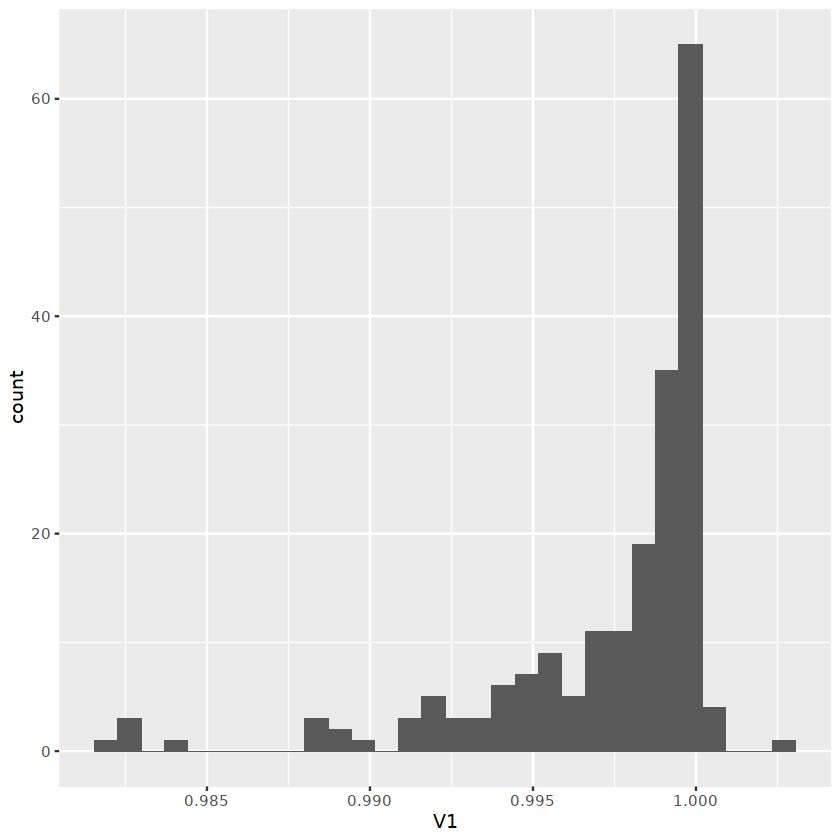

In [2]:
abl[, ':=' (fraction_nonhuman_reads = new_est_reads/read_count, fraction_human_nonhuman_reads = new_est_reads/total_reads)]
# abl[1:10]
abl[, sum(fraction_total_reads), by = run_accession][, mean(V1)]

# are the fractions correct?
#colSums(abl[, .(fraction_total_reads, fraction_nonhuman_reads, fraction_human_nonhuman_reads)])
ggplot(abl[, sum(fraction_total_reads), by = .(run_accession)]) +
    geom_histogram(aes(x = V1))

In [40]:
colnames(abl)

[1] "run_accession"                 "taxon_name"                   
 [3] "taxonomy_id"                   "taxonomy_lvl"                 
 [5] "kraken_assigned_reads"         "added_reads"                  
 [7] "new_est_reads"                 "fraction_total_reads"         
 [9] "host_subject_id"               "patient_code"                 
[11] "nuc"                           "host_body_site"               
[13] "host_disease_status"           "miscellaneous_parameter"      
[15] "Ct"                            "total_reads"                  
[17] "read_count"                    "base_count"                   
[19] "fraction_nonhuman_reads"       "fraction_human_nonhuman_reads"

In [28]:
abl[taxon_name %like% "Severe acute respiratory", .(run_accession, taxon_name, 
                                  fraction_total_reads, Ct)][order(-fraction_total_reads)][1:20]

# is there a relationship between Ct values and SARS-Cov2 presence?
ggplot(abl[taxon_name %like% "Severe acute respiratory"]) +
    geom_point(aes(x = fraction_total_reads, y = Ct, color = host_disease_status)) +
    facet_wrap(~nuc)

run_accession,taxon_name,fraction_total_reads,Ct
<chr>,<chr>,<dbl>,<dbl>
ERR6913216,Severe acute respiratory syndrome-related coronavirus,0.77822,17.99
ERR6913199,Severe acute respiratory syndrome-related coronavirus,0.75690,18.81
ERR6913221,Severe acute respiratory syndrome-related coronavirus,0.73823,17.88
ERR6913210,Severe acute respiratory syndrome-related coronavirus,0.41324,19.52
ERR6913214,Severe acute respiratory syndrome-related coronavirus,0.38784,17.81
ERR6913211,Severe acute respiratory syndrome-related coronavirus,0.28791,19.63
ERR6913215,Severe acute respiratory syndrome-related coronavirus,0.22142,18.89
ERR6913203,Severe acute respiratory syndrome-related coronavirus,0.21930,19.38
ERR6913217,Severe acute respiratory syndrome-related coronavirus,0.19576,17.56


ERROR: Error in Cairo::Cairo(width, height, tf, "png", pointsize, bg, "transparent", : Failed to create Cairo backend!


plot without title

In [3]:
# log2 transform the fractions
abl[, fraction_total_reads_log := log2(fraction_total_reads + min(abl[fraction_total_reads != 0, fraction_total_reads])/100)]
abl[, fraction_nonhuman_reads_log := log2(fraction_nonhuman_reads + min(abl[fraction_nonhuman_reads != 0, fraction_nonhuman_reads])/100)]

In [80]:
#abl[, .(sum(fraction_nonhuman_reads), sum(fraction_nonhuman_reads_log)), by = taxon_name][order(-V1)][1:5]
#abl[, .(sum(fraction_nonhuman_reads), sum(fraction_nonhuman_reads_log)), by = .(taxon_name, run_accession)][order(-V1)][1:5]
#abl[, .(sum(fraction_nonhuman_reads), sum(fraction_nonhuman_reads_log)), by = taxon_name][order(-V2)][1:5]
#abl[, .(sum(fraction_nonhuman_reads), sum(fraction_nonhuman_reads_log)), by = .(taxon_name, run_accession)][order(-V2)][1:5]

taxon_name,V1,V2
<chr>,<dbl>,<dbl>
Prevotella melaninogenica,2.693110,-975.5244
Streptococcus salivarius,2.463413,-1062.8195
Veillonella atypica,1.889607,-888.9473
Cutibacterium acnes,1.488029,-2031.2346
Prevotella jejuni,1.413457,-1034.4360


taxon_name,run_accession,V1,V2
<chr>,<chr>,<dbl>,<dbl>
Influenza A virus,ERR6913269,0.4567765,-1.130440
Haemophilus influenzae,ERR6913250,0.4338889,-1.204602
Haemophilus influenzae,ERR6913154,0.3869891,-1.369635
Klebsiella pneumoniae,ERR6913314,0.3522060,-1.505509
Cutibacterium acnes,ERR6913252,0.3281830,-1.607428


taxon_name,V1,V2
<chr>,<dbl>,<dbl>
Influenza A virus,0.456776528,-1.130440
Human coronavirus HKU1,0.004013244,-7.961014
Enterovirus D,0.003126624,-8.321177
Human coronavirus NL63,0.002497027,-8.645571
Stenotrophomonas sp. PAMC25021,0.002484417,-8.652875


taxon_name,run_accession,V1,V2
<chr>,<chr>,<dbl>,<dbl>
Influenza A virus,ERR6913269,0.4567765,-1.130440
Haemophilus influenzae,ERR6913250,0.4338889,-1.204602
Haemophilus influenzae,ERR6913154,0.3869891,-1.369635
Klebsiella pneumoniae,ERR6913314,0.3522060,-1.505509
Cutibacterium acnes,ERR6913252,0.3281830,-1.607428


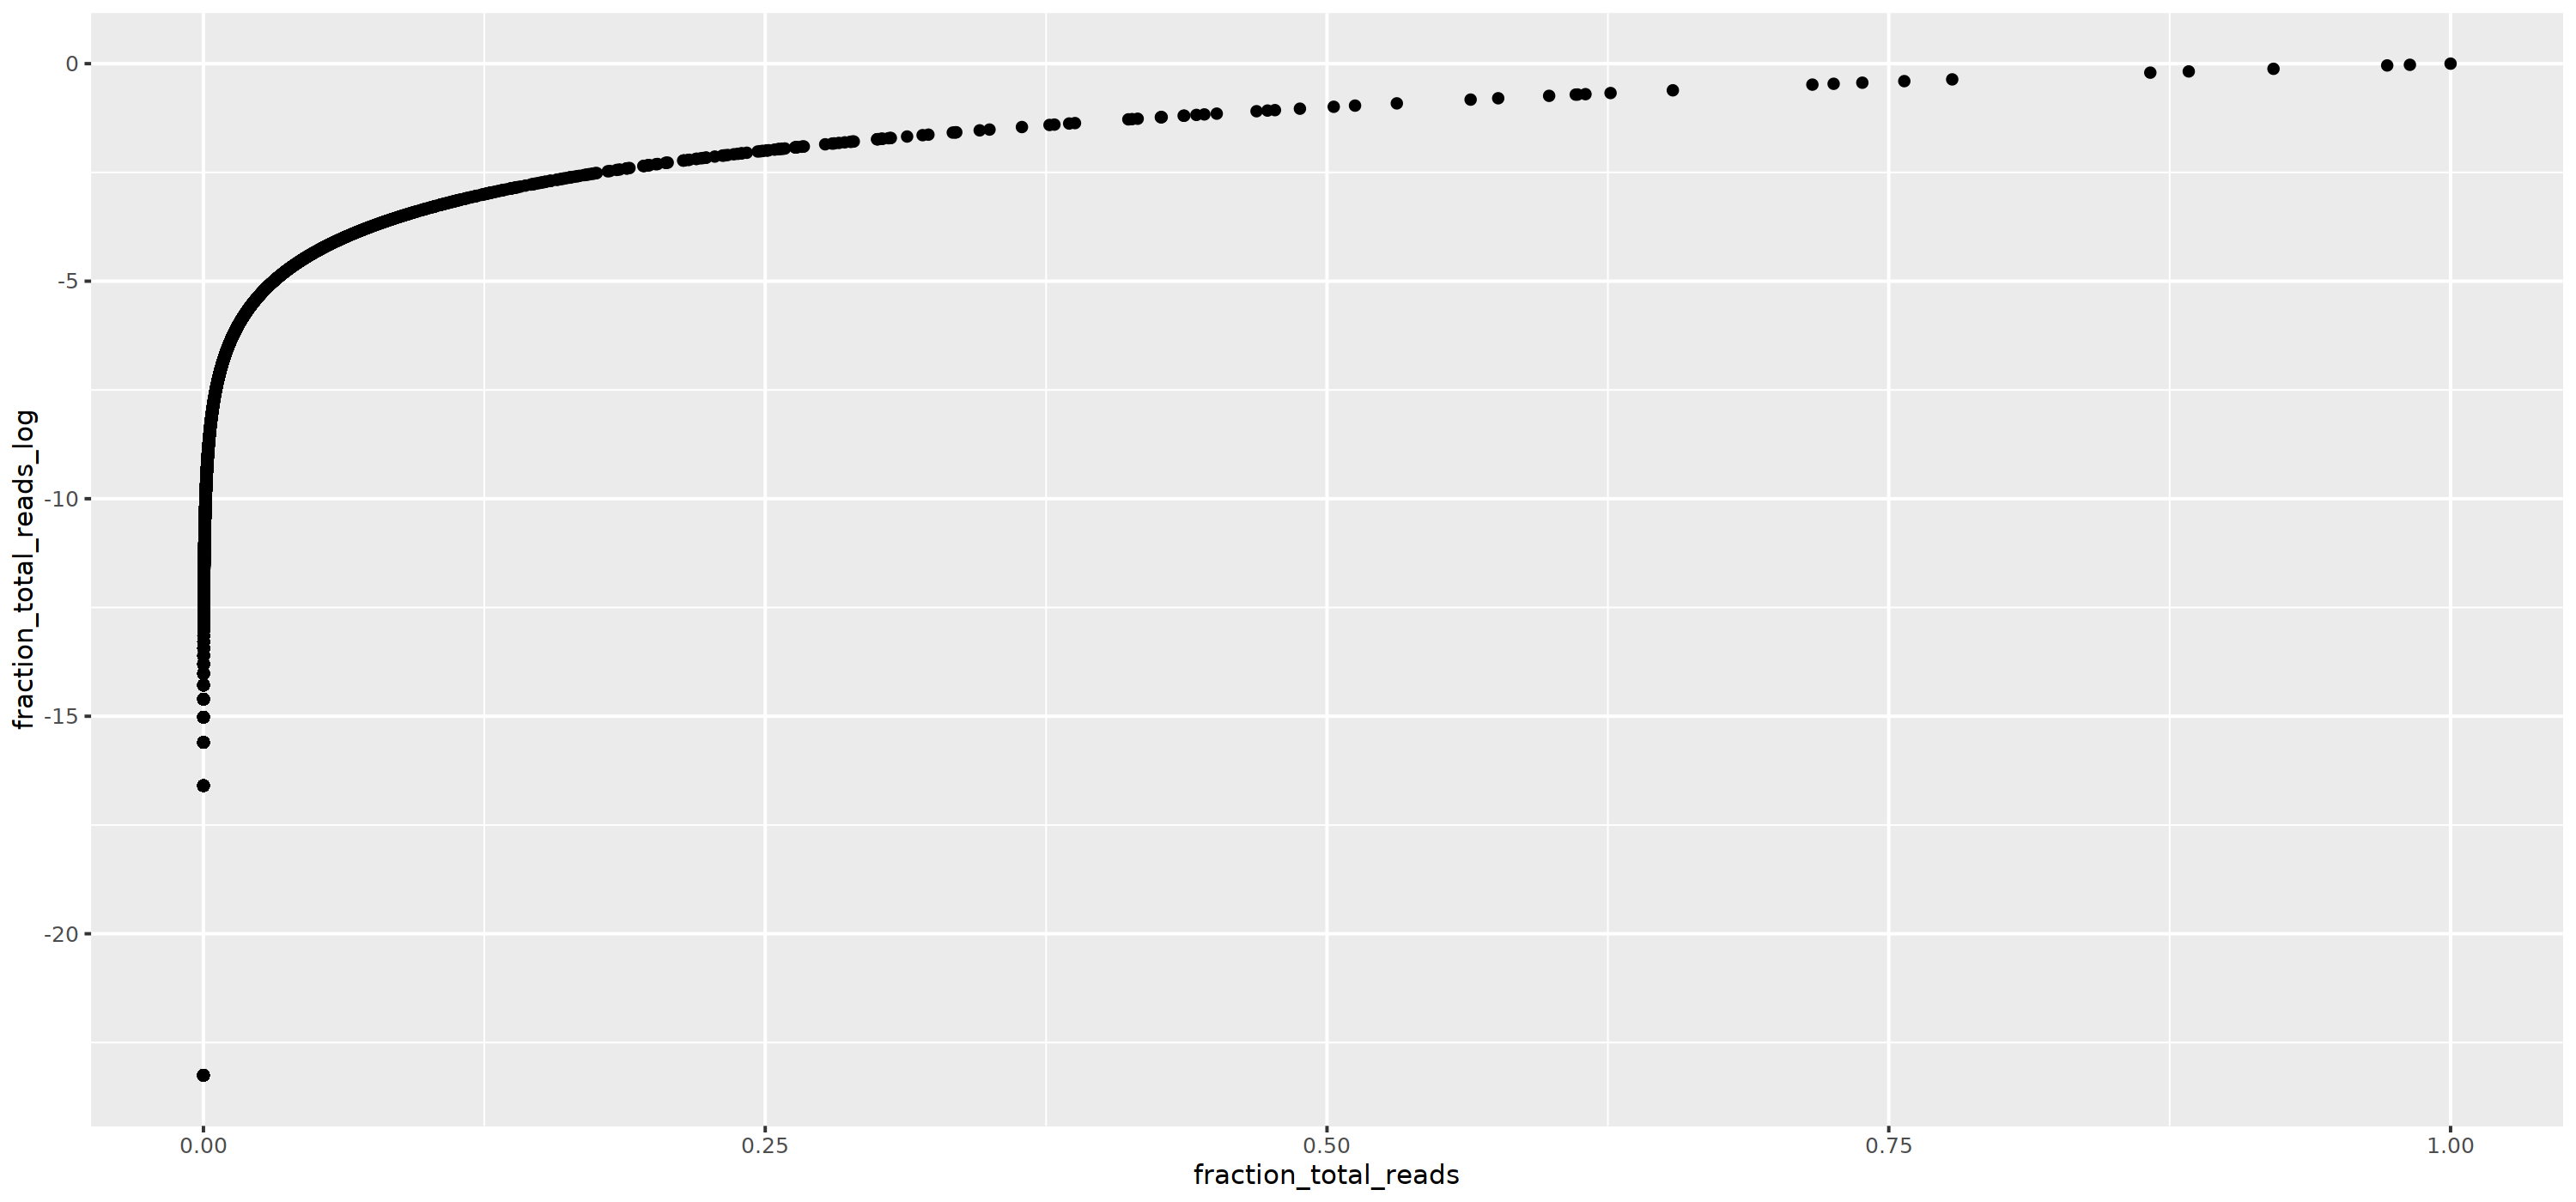

$colour
[1] "none"

attr(,"class")
[1] "guides"

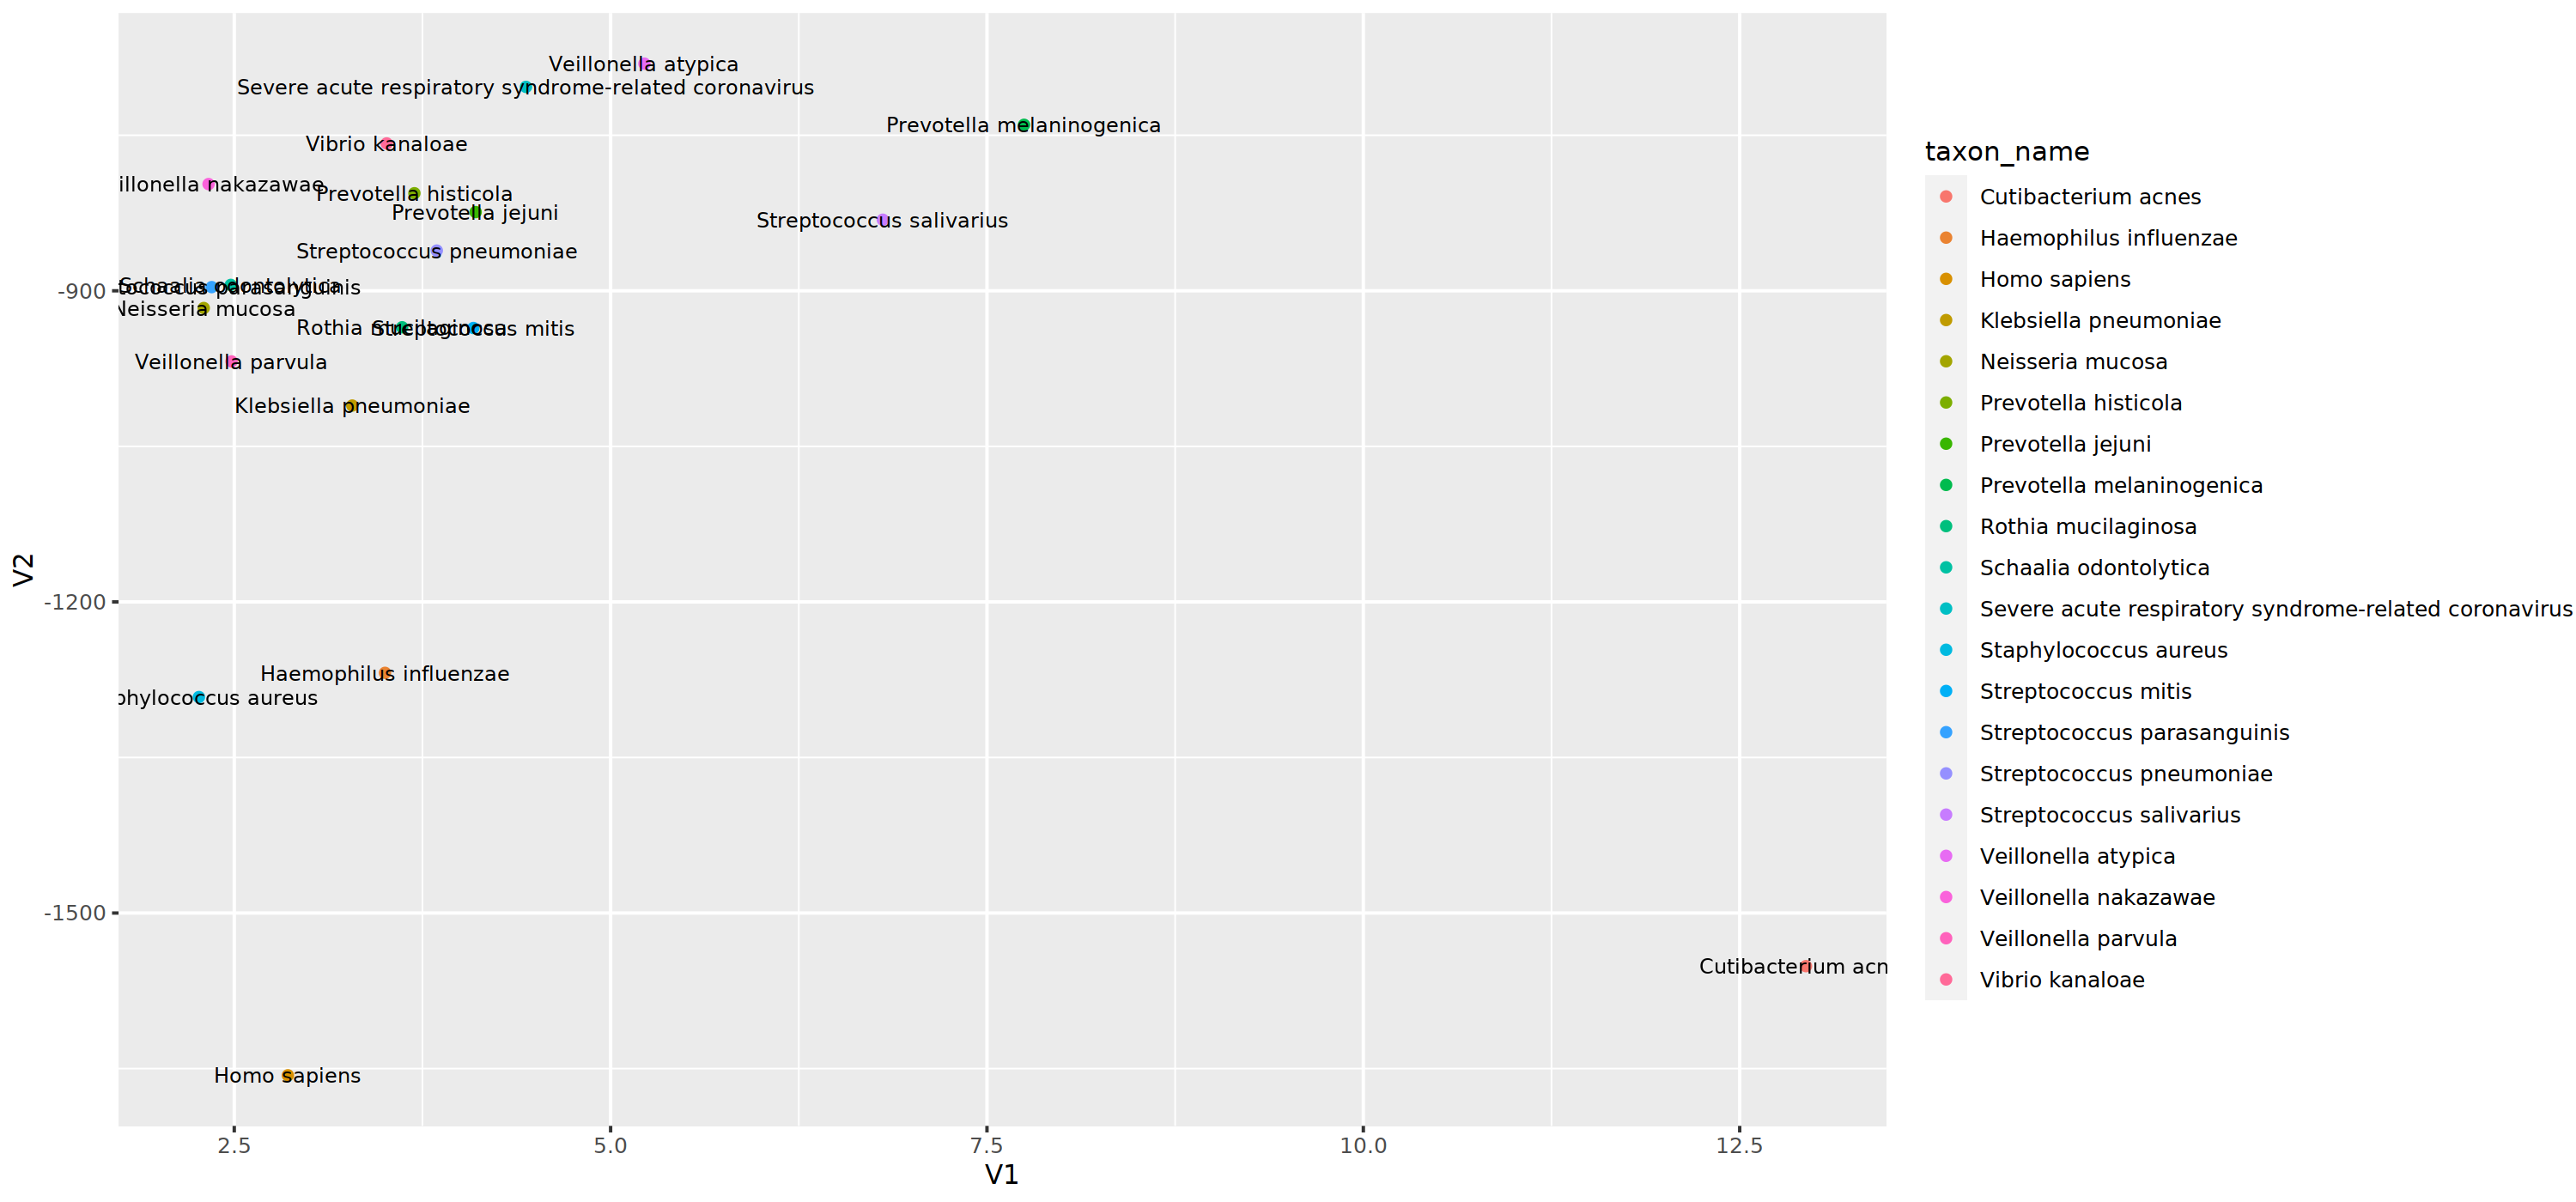

$colour
[1] "none"

attr(,"class")
[1] "guides"

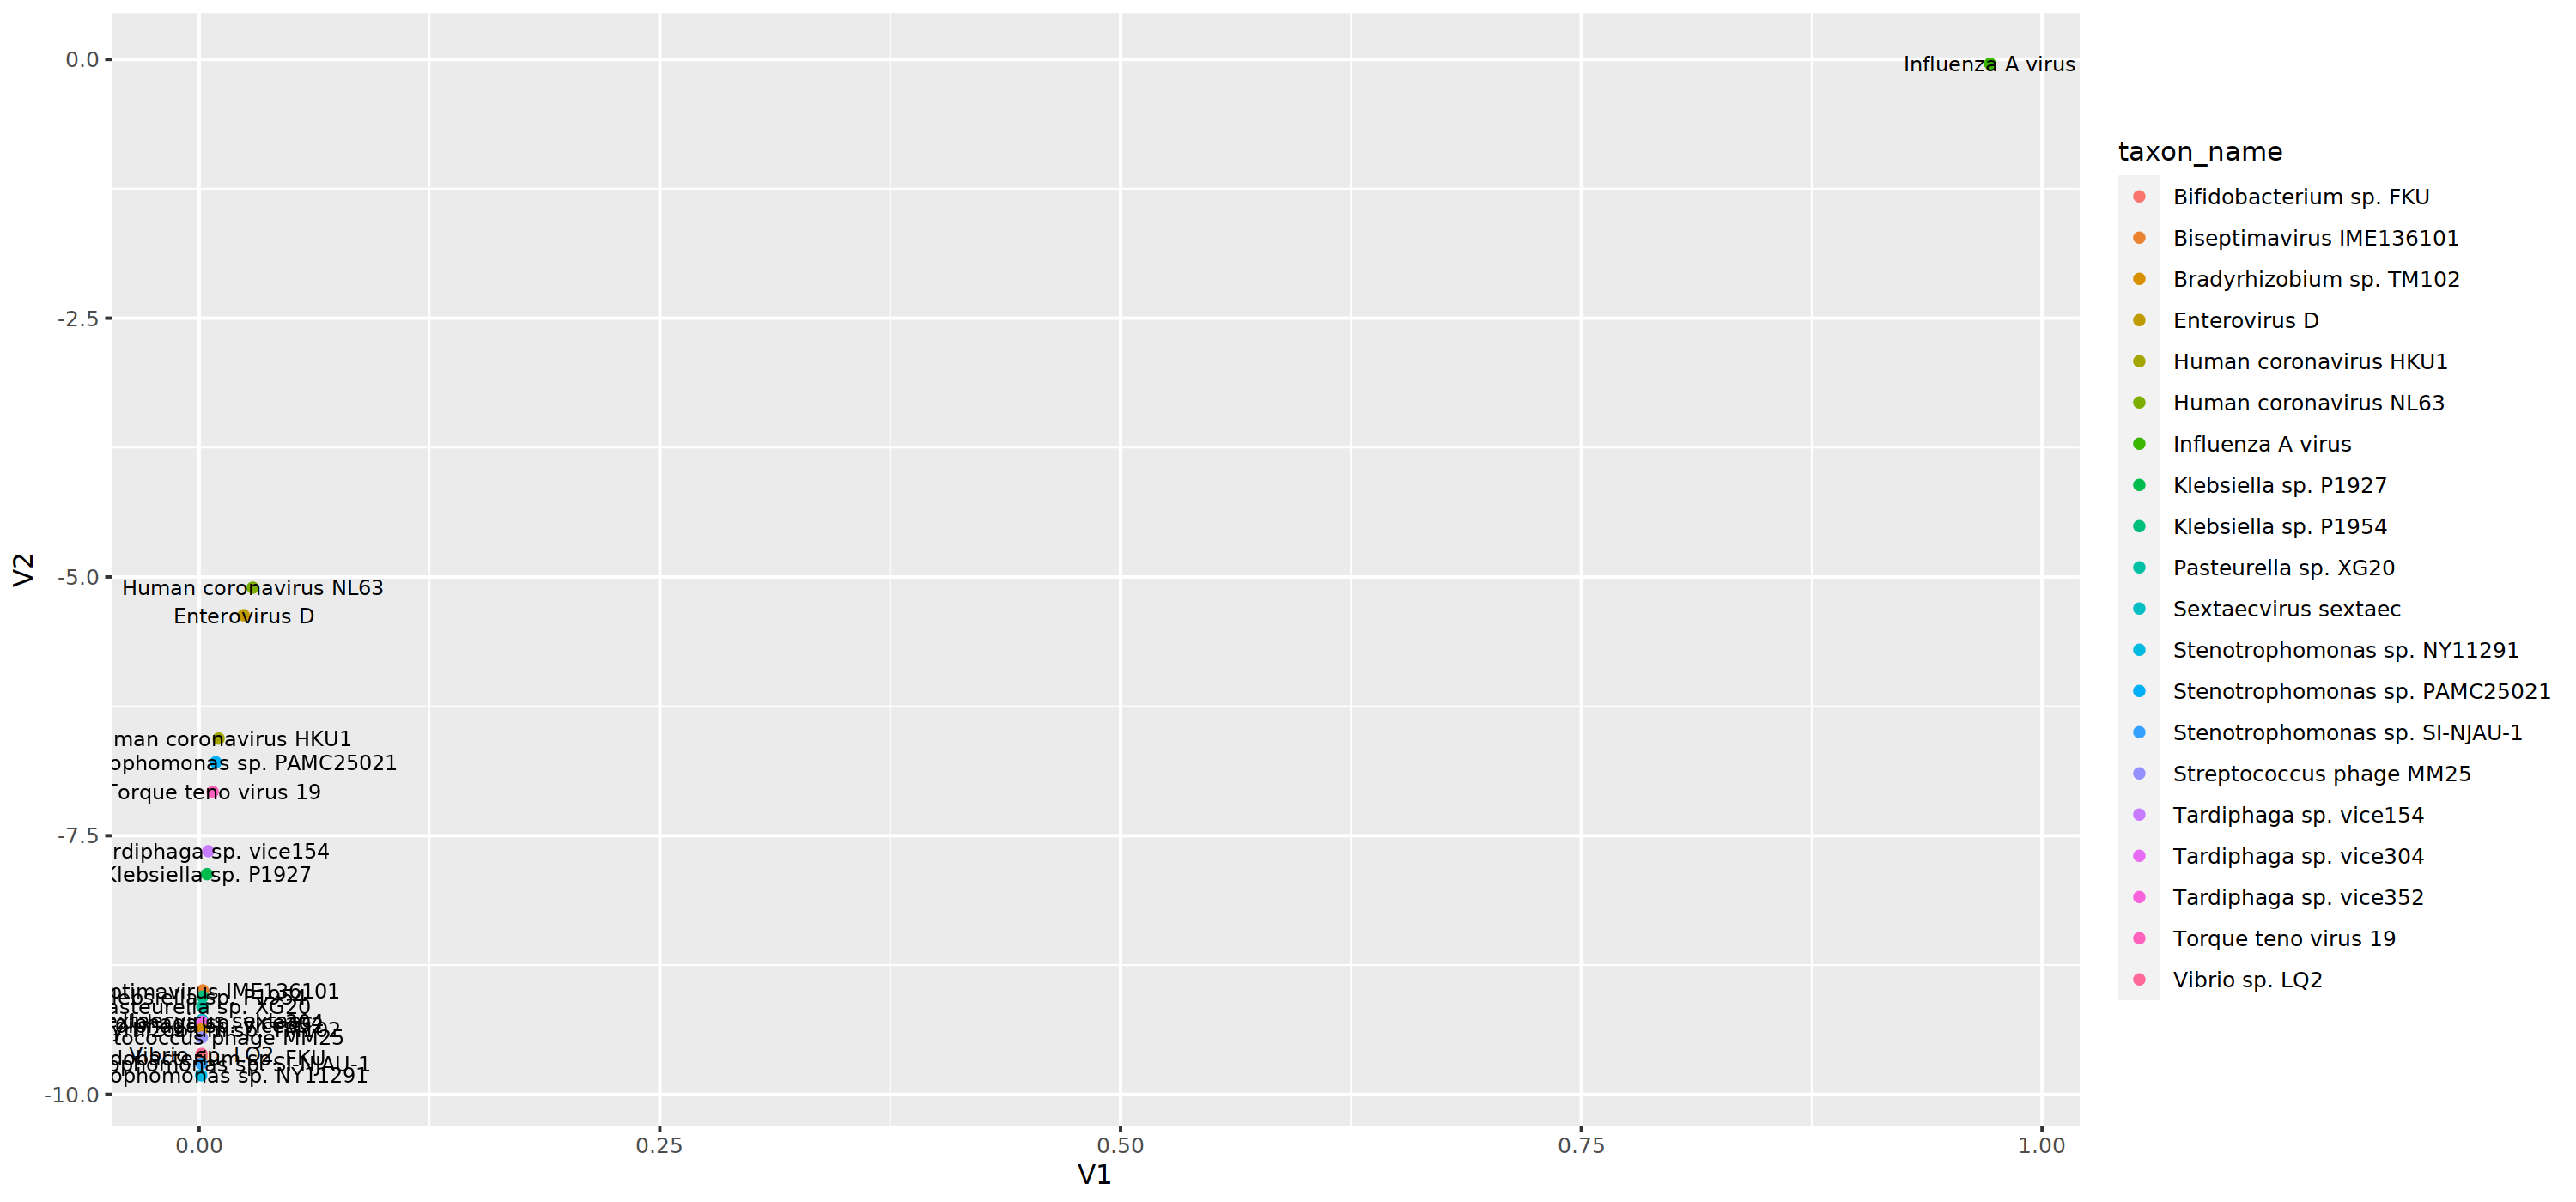

In [326]:
#ggplot(abl[, .(fraction_total_reads, fraction_total_reads_log)])+
#   geom_point(aes( x = fraction_total_reads, y = fraction_total_reads_log))

#ggplot(abl[, .(sum(fraction_total_reads), sum(fraction_total_reads_log)), by = taxon_name][order(-V1)][1:20]) +
#    geom_point(aes( x = V1, y = V2, color = taxon_name)) +
#    geom_text(aes(x = V1, y = V2, label = taxon_name), size = 3)
#    guides(color = "none")
#options(repr.plot.width = 15, repr.plot.height = 7, repr.plot.res = 200)
#ggplot(abl[, .(sum(fraction_total_reads), sum(fraction_total_reads_log)), by = taxon_name][order(-V2)][1:20]) +
#    geom_point(aes( x = V1, y = V2, color = taxon_name)) +
#    geom_text(aes(x = V1, y = V2, label = taxon_name), size = 3)
#    guides(color = "none")

Warning message:
“Removed 41313 rows containing missing values (geom_point).”


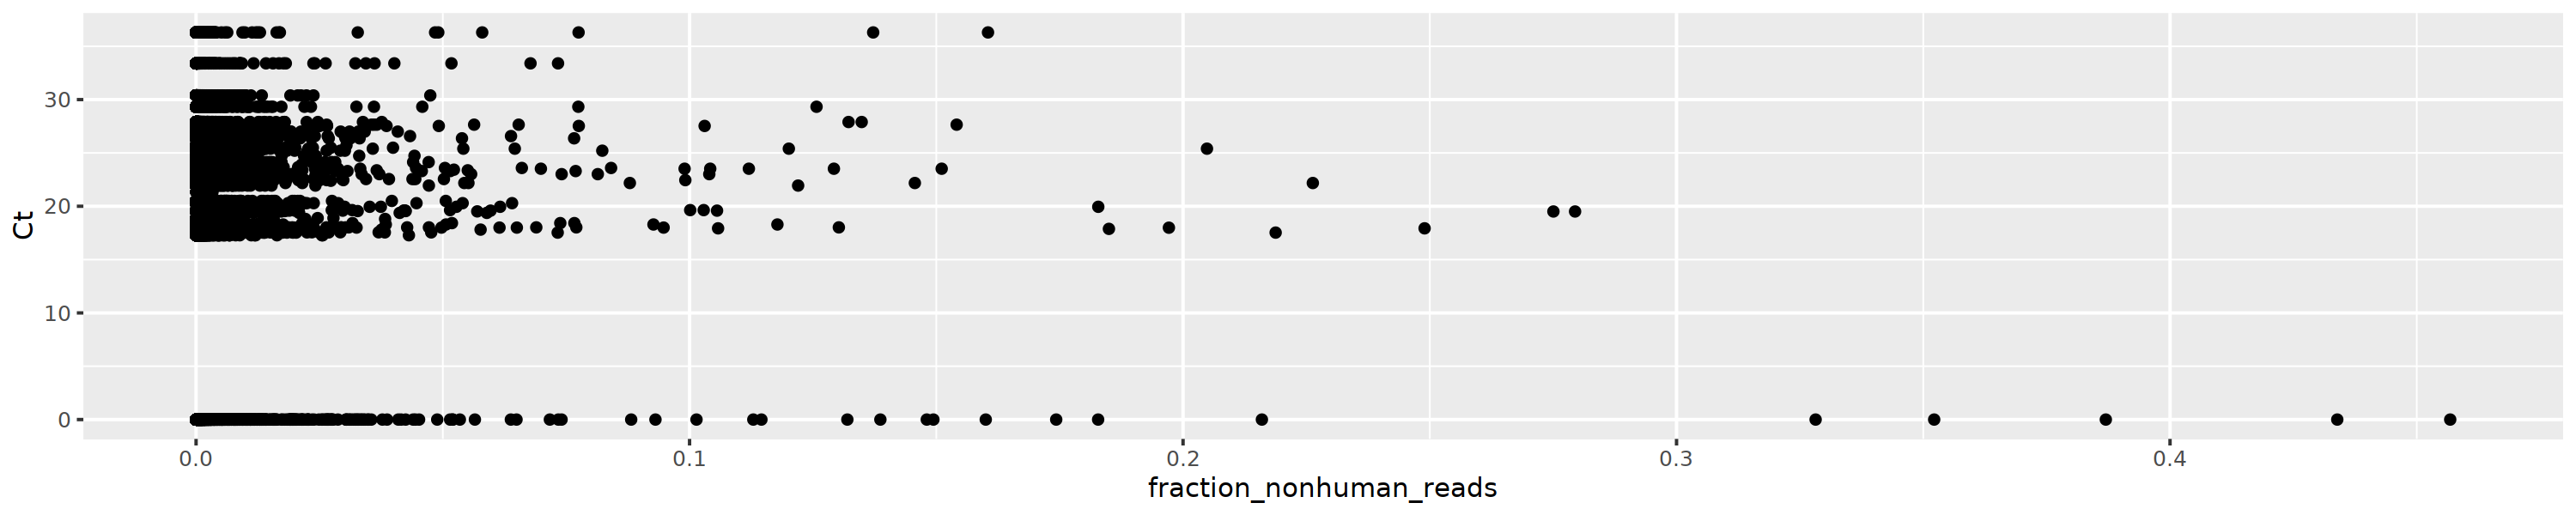

In [145]:
ggplot(abl[, .(Ct, fraction_nonhuman_reads)]) +
    geom_point(aes(y = Ct, x = fraction_nonhuman_reads))

In [87]:
colnames(abl)

[1] "run_accession"                 "taxon_name"                   
 [3] "taxonomy_id"                   "taxonomy_lvl"                 
 [5] "kraken_assigned_reads"         "added_reads"                  
 [7] "new_est_reads"                 "fraction_total_reads"         
 [9] "host_subject_id"               "patient_code"                 
[11] "nuc"                           "host_body_site"               
[13] "host_disease_status"           "miscellaneous_parameter"      
[15] "Ct"                            "total_reads"                  
[17] "read_count"                    "base_count"                   
[19] "fraction_nonhuman_reads"       "fraction_human_nonhuman_reads"
[21] "fraction_total_reads_log"      "fraction_nonhuman_reads_log"

In [4]:
# most common pathogens
path_list <- c('Dolosigranulum pigrum','Haemophilus influenzae', 'Haemophilus parainfluenzae',
'Klebsiella pneumoniae','Streptococcus pneumoniae','Staphylococcus aureus','Influenza A virus',
 'Severe acute respiratory syndrome-related coronavirus','Chlamydia pneumoniae',
'Haemophilus parainfluenzae','Serratia marcescens','Enterobacter hormaechei', 
'Enterobacter cloacae', 'Enterobacter asburiae','Burkholderia multivorans',
'Human coronavirus HKU1','Human coronavirus NL63','Rhinovirus A')

abl[taxon_name %in% path_list, mean(fraction_nonhuman_reads_log), by = .(taxon_name, taxonomy_id)][order(-V1)][1:10]

taxon_name,taxonomy_id,V1
<chr>,<int>,<dbl>
Influenza A virus,11320,-1.130440
Human coronavirus HKU1,290028,-7.961014
Streptococcus pneumoniae,1313,-8.191470
Human coronavirus NL63,277944,-8.645571
Haemophilus parainfluenzae,729,-9.964533
Klebsiella pneumoniae,573,-11.667248
Severe acute respiratory syndrome-related coronavirus,694009,-12.370160
Haemophilus influenzae,727,-12.408075
Staphylococcus aureus,1280,-12.946517


In [5]:
# how many from the list are present in the dataset?
length(abl[taxon_name %in% path_list, unique(taxon_name)])

[1] 16

In [32]:
# Untransformed values
ggplot(abl[1:10000]) +
    geom_tile(aes(x = run_accession, y = taxon_name, fill =  fraction_nonhuman_reads))

#options(repr.plot.width = 50, repr.plot.height = 200, repr.plot.res = 100)

ERROR: Error in Cairo::Cairo(width, height, tf, "png", pointsize, bg, "transparent", : Failed to create Cairo backend!


plot without title

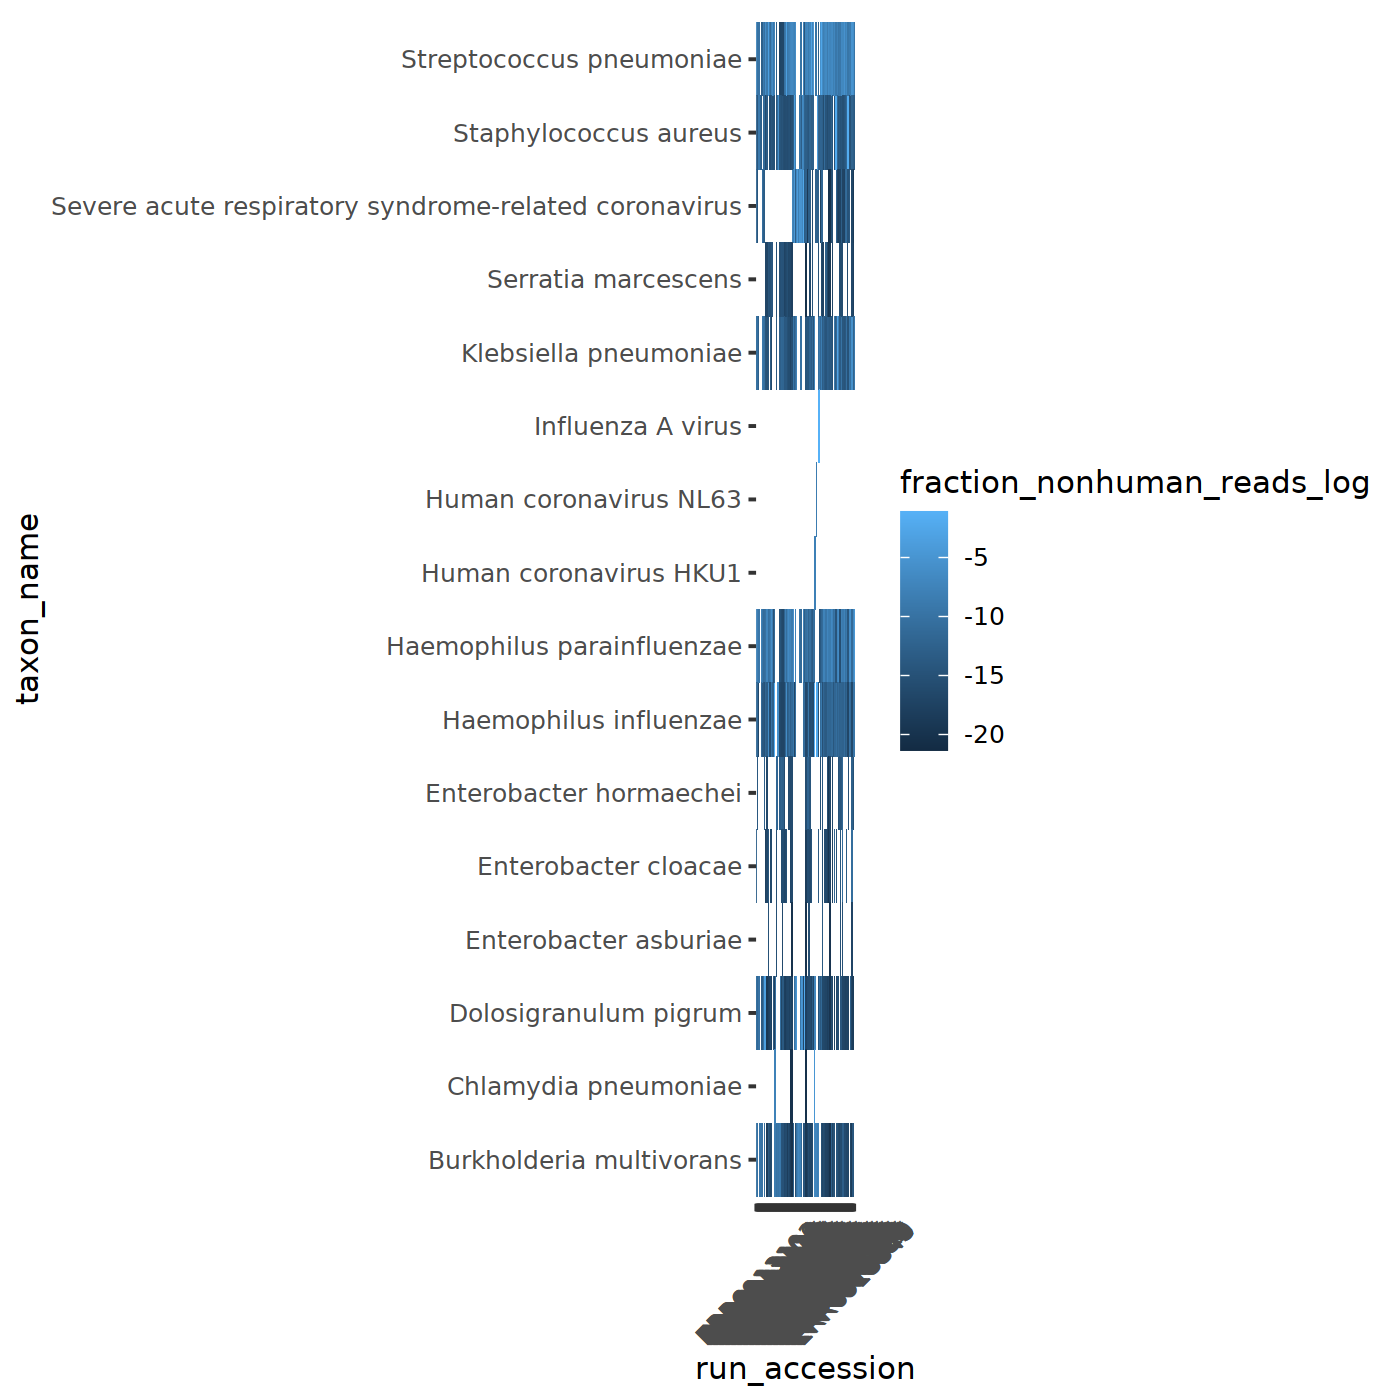

In [5]:
# log2 transformed values
ggplot(abl[taxon_name %in% path_list]) +
           geom_tile(aes(x = run_accession, y = taxon_name, fill =  fraction_nonhuman_reads_log)) +
            theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=.5))
                      
options(repr.plot.width = 200, repr.plot.height = 3, repr.plot.res = 200)

In [6]:
# Pivot wider
abw <- pivot_wider(abl, names_from = run_accession, id_cols = taxon_name, 
                   values_from = fraction_nonhuman_reads_log)
setDT(abw)
abw[, taxon_name := as.factor(taxon_name)]
#abw[is.na(abw)] <- 0 # insanely slow
abw <- replace(abw, is.na(abw), abl[, min(fraction_nonhuman_reads_log)]) # better

# reaorder colnames to facilitate heatmap annotation
colnames_to_order <- colnames(abw[, -1])
colnames_to_order <- colnames_to_order[order(colnames_to_order)]
setcolorder(abw, c("taxon_name", colnames_to_order))

In [7]:
abw[, sum := rowSums(abw[,-1], na.rm = T)]
#abw[, mean := rowMeans(abw[,-1], na.rm = T)]

In [8]:
# Prepare row annotation
# THAT DOESN'T WORK WITH HEATMAPLY-PLOTLY - IT NEEDS 2 ROW ANNOTATIONS TO SHOW THEM CORRECLTY - GGPLOT method has to be used - GGPLOT, however, is plotting a strange 'scale' on the side..
rows_annot <- abw[, .(taxon_name)]
abw[, pathogenic := "non-pathogenic"]
abw[taxon_name %in% path_list, pathogenic := "pathogenic"]
abw[taxon_name %like% 'Severe', pathogenic := "SARS-Cov2"]
abw[, pathogenic := as.factor(pathogenic)]
#abw <- merge(abw, rows_annot, by = 'taxon_name')

In [9]:
# Prepare column annotation
cols_annot <- abl[, .(run_accession, nuc, host_disease_status, Ct)]
cols_annot <- cols_annot[unique(run_accession), on = 'run_accession', mult = 'first']
cols_annot <- cols_annot[order(run_accession)]

In [10]:
# Prepare a list of 10000 taxa
'%notin%' <- Negate('%in%')
taxa_heat <- abw[taxon_name %notin% path_list, sample(taxon_name, 984)]
taxa_heat <- as.character(taxa_heat)
taxa_heat <- c(taxa_heat, path_list)

In [ ]:
#tax_num <- 1000

heatmaply(
    abw[order(-sum), -200:-ncol(abw)][taxon_name %in% taxa_heat, -1],
    labRow = abw[taxon_name %in% taxa_heat][order(-sum)]$taxon_name,
    colors = colorRampPalette(c('white', 'orange', 'red'))(200),
    k_col = 2, k_row = 2,
    row_side_colors   = abw[taxon_name %in% taxa_heat][order(-sum), .(pathogenic)],
    col_side_colors = cols_annot,
    main = 'Oral micobiome diversity in Covid+/- patients',
    key.title = 'abundance',
    plot_method = c('ggplot'),
    xlab = 'Run Accession',
    showticklabels = c(FALSE, TRUE),
    hide_colorbar = TRUE
        ) %>% layout(height = 1250, width = 1000)